In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import numpy as np

In [2]:
df=pd.read_csv("C:\\Users\\HP USER\\Documents\\Guvi\\Project\\04_Copper_modelling\\copper.csv")

C:\Users\HP USER\AppData\Local\Temp\ipykernel_10316\1060654900.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("C:\\Users\\HP USER\\Documents\\Guvi\\Project\\04_Copper_modelling\\copper.csv")


In [3]:
df.head(5)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [4]:
df.shape

(181673, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [6]:
df.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [7]:
df1 = df.copy()

In [8]:
df1['item_date'].ffill(inplace=True)
df1['delivery date'].ffill(inplace=True)

C:\Users\HP USER\AppData\Local\Temp\ipykernel_10316\1953431939.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['item_date'].ffill(inplace=True)
C:\Users\HP USER\AppData\Local\Temp\ipykernel_10316\1953431939.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

In [9]:
df1.isnull().sum()

id                   2
item_date            0
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        0
selling_price        1
dtype: int64

In [10]:
df1['item_date'] = df1['item_date'].astype(int)

In [11]:
df1.drop(df1[df1['item_date']<20190101].index, inplace=True)#format of the date is not matched with the format of other date and so it is dropped

In [12]:
df1.drop(df1[df1['item_date']==20191919].index, inplace=True)#format of the date is not matched with the format of other date and so it is dropped

In [13]:
df1['item_date'] = pd.to_datetime(df1['item_date'],format='%Y%m%d')

In [14]:
df1['delivery date'] = df1['delivery date'].astype(int)

In [15]:
df1.drop(df1[df1['delivery date'] == 30310101].index, inplace = True)

In [16]:
pd.to_datetime(df1['delivery date'][105420],format='%Y%m%d')

Timestamp('2021-01-01 00:00:00')

In [17]:
df1['delivery date'][105421]

20212222

In [18]:
df1.drop(df1[df1['delivery date'] == 20212222].index, inplace = True)

In [19]:
df1['delivery date'] = pd.to_datetime(df1['delivery date'],format='%Y%m%d')

In [20]:
df1['quantity tons'] = pd.to_numeric(df1['quantity tons'], errors = 'coerce' )

In [21]:
df1.dropna(subset=['quantity tons'], inplace=True)

In [22]:
df1.isnull().sum()

id                   2
item_date            0
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77915
product_ref          0
delivery date        0
selling_price        1
dtype: int64

In [23]:
#dropping the unique value columns
df2=df1.drop(['id','material_ref','product_ref', 'customer'], axis=1)

In [24]:
df2.isnull().sum()

item_date         0
quantity tons     0
country          28
status            2
item type         0
application      24
thickness         1
width             0
delivery date     0
selling_price     1
dtype: int64

In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181668 entries, 0 to 181672
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   item_date      181668 non-null  datetime64[ns]
 1   quantity tons  181668 non-null  float64       
 2   country        181640 non-null  float64       
 3   status         181666 non-null  object        
 4   item type      181668 non-null  object        
 5   application    181644 non-null  float64       
 6   thickness      181667 non-null  float64       
 7   width          181668 non-null  float64       
 8   delivery date  181668 non-null  datetime64[ns]
 9   selling_price  181667 non-null  float64       
dtypes: datetime64[ns](2), float64(6), object(2)
memory usage: 15.2+ MB


In [26]:
df2.describe()

,item_date,quantity tons,country,application,thickness,width,delivery date,selling_price
count,181668,1.816680e+05,181640.000000,181644.000000,181667.000000,181668.000000,181668,1.816670e+05
mean,2020-11-26 22:57:03.317260032,5.875054e+03,44.892953,25.615594,2.564866,1295.287728,2021-01-25 22:45:18.964264704,1.918063e+03
min,2020-07-02 00:00:00,-2.000000e+03,25.000000,2.000000,0.180000,1.000000,2019-04-01 00:00:00,-1.160000e+03
25%,2020-09-29 00:00:00,1.097003e+01,26.000000,10.000000,0.700000,1180.000000,2020-11-01 00:00:00,6.690000e+02
50%,2020-11-30 00:00:00,3.036464e+01,30.000000,15.000000,1.500000,1250.000000,2021-01-01 00:00:00,8.120000e+02
75%,2021-02-03 00:00:00,6.716061e+01,78.000000,41.000000,3.000000,1500.000000,2021-04-01 00:00:00,9.530000e+02
max,2021-04-01 00:00:00,1.000000e+09,113.000000,99.000000,2500.000000,2990.000000,2022-01-01 00:00:00,1.000010e+08
std,NaN,2.349107e+06,24.404206,17.753925,6.572405,261.633978,NaN,3.318002e+05


In [27]:
#from the above we can understand that quantity tons and selling price have -ve value, which is unrealistic,so those rows should be dropped.

In [28]:
df2[(df2['quantity tons']<0)]

,item_date,quantity tons,country,status,item type,application,thickness,width,delivery date,selling_price
105730,2020-11-11,-4.000000,27.0,Won,S,15.0,1.50,1500.0,2021-01-01,723.0
131473,2020-10-02,-1.476794,27.0,Draft,S,10.0,0.60,1220.0,2021-01-01,22.0
181661,2020-07-02,-18.000000,25.0,Won,W,41.0,0.84,1220.0,2020-07-01,590.0
181671,2020-07-02,-2000.000000,25.0,Won,W,41.0,0.85,1250.0,2020-07-01,601.0


In [29]:
df2[(df2['selling_price']<0)]

,item_date,quantity tons,country,status,item type,application,thickness,width,delivery date,selling_price
28,2021-04-01,99.059199,30.0,Won,W,41.0,0.595,1207.0,2021-04-01,-1160.0
44761,2021-02-04,101.397995,32.0,Won,W,41.0,1.250,1100.0,2021-04-01,-730.0
44810,2021-02-03,12.225889,78.0,Won,W,41.0,0.750,1250.0,2021-04-01,-445.0
44865,2021-02-03,28.368563,27.0,Not lost for AM,PL,10.0,1.500,1270.0,2021-05-01,-25.0
105189,2020-11-12,5.280274,25.0,Won,W,15.0,6.000,1250.0,2021-02-01,-336.0


In [30]:
index_to_drop_selling_price = df2[df2['selling_price'] < 0].index
index_to_drop_quanitiy_tons = df2[(df2['quantity tons']<0)].index
df2 = df2.drop(index_to_drop_selling_price)
df3 = df2.drop(index_to_drop_quanitiy_tons)

In [31]:
df3.describe()

,item_date,quantity tons,country,application,thickness,width,delivery date,selling_price
count,181659,1.816590e+05,181631.000000,181635.000000,181658.000000,181659.000000,181659,1.816580e+05
mean,2020-11-26 22:57:28.337819904,5.875355e+03,44.893548,25.615460,2.564917,1295.289878,2021-01-25 22:46:40.548280064,1.918162e+03
min,2020-07-02 00:00:00,1.000000e-05,25.000000,2.000000,0.180000,1.000000,2019-04-01 00:00:00,0.000000e+00
25%,2020-09-29 00:00:00,1.097069e+01,26.000000,10.000000,0.700000,1180.000000,2020-11-01 00:00:00,6.690000e+02
50%,2020-11-30 00:00:00,3.036502e+01,30.000000,15.000000,1.500000,1250.000000,2021-01-01 00:00:00,8.120000e+02
75%,2021-02-03 00:00:00,6.716084e+01,78.000000,41.000000,3.000000,1500.000000,2021-04-01 00:00:00,9.530000e+02
max,2021-04-01 00:00:00,1.000000e+09,113.000000,99.000000,2500.000000,2990.000000,2022-01-01 00:00:00,1.000010e+08
std,NaN,2.349165e+06,24.404401,17.754071,6.572554,261.639345,NaN,3.318084e+05


In [32]:
df3.isnull().sum()

item_date         0
quantity tons     0
country          28
status            2
item type         0
application      24
thickness         1
width             0
delivery date     0
selling_price     1
dtype: int64

In [33]:
df3['country'].fillna(df3['country'].mode()[0],inplace=True) #numerical column,representing unique country,so I choose mode
df3['application'].fillna(df3['application'].median(),inplace=True) #numerical column, so I choose median
df3['thickness'].fillna(df3['thickness'].mode()[0],inplace=True) #numerical column, so I choose mode
df3['selling_price'].fillna(df3['selling_price'].mean(),inplace=True) #numerical column, our target column, so I choose mean

C:\Users\HP USER\AppData\Local\Temp\ipykernel_10316\1802583002.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df3['country'].fillna(df3['country'].mode()[0],inplace=True) #numerical column,representing unique country,so I choose mode
C:\Users\HP USER\AppData\Local\Temp\ipykernel_10316\1802583002.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the interm

In [34]:
df3.isnull().sum()

item_date        0
quantity tons    0
country          0
status           2
item type        0
application      0
thickness        0
width            0
delivery date    0
selling_price    0
dtype: int64

In [35]:
#status is a categorical column, but we should have only won or lost, as we have to predict only won or lost not other thing, so we are dropping all the other values in this column

In [36]:
df3['status'].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable', nan], dtype=object)

In [37]:
df4= df3[(df3['status']=='Won') | (df3['status']=='Lost')]

In [38]:
df4.isnull().sum()

item_date        0
quantity tons    0
country          0
status           0
item type        0
application      0
thickness        0
width            0
delivery date    0
selling_price    0
dtype: int64

In [39]:
#Now lest segregate the columns as numericals and categoricals
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150437 entries, 0 to 181672
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   item_date      150437 non-null  datetime64[ns]
 1   quantity tons  150437 non-null  float64       
 2   country        150437 non-null  float64       
 3   status         150437 non-null  object        
 4   item type      150437 non-null  object        
 5   application    150437 non-null  float64       
 6   thickness      150437 non-null  float64       
 7   width          150437 non-null  float64       
 8   delivery date  150437 non-null  datetime64[ns]
 9   selling_price  150437 non-null  float64       
dtypes: datetime64[ns](2), float64(6), object(2)
memory usage: 12.6+ MB


In [40]:
categorical_columns = [i for i in df4.columns if df4[i].dtype== "object"]
numerical_columns = [i for i in df4.columns if df4[i].dtype== "float64" or df4[i].dtype==  "int64"]

In [41]:
categorical_columns

['status', 'item type']

In [42]:
numerical_columns 

['quantity tons',
 'country',
 'application',
 'thickness',
 'width',
 'selling_price']

In [43]:
outlier_Detection_columns=['quantity tons', 'country', 'application', 'thickness', 'width']

In [44]:
#Univariate Analysis

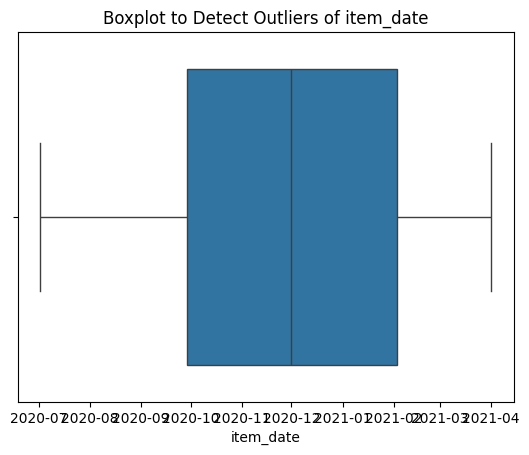

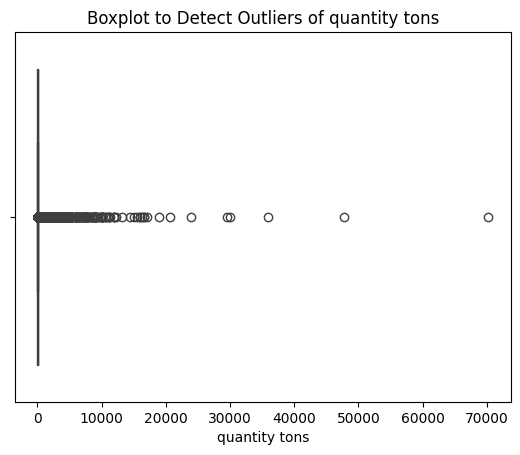

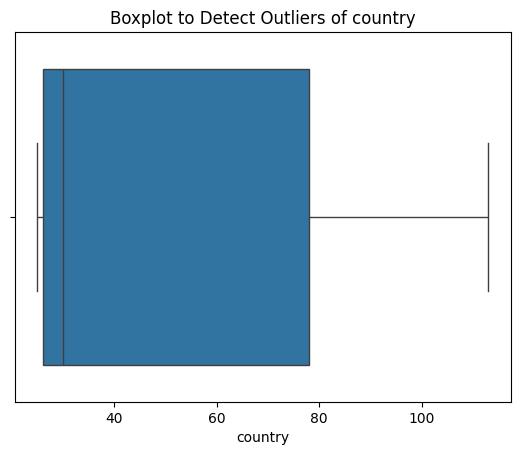

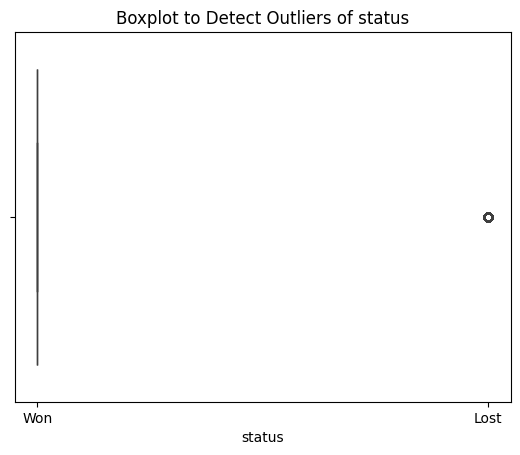

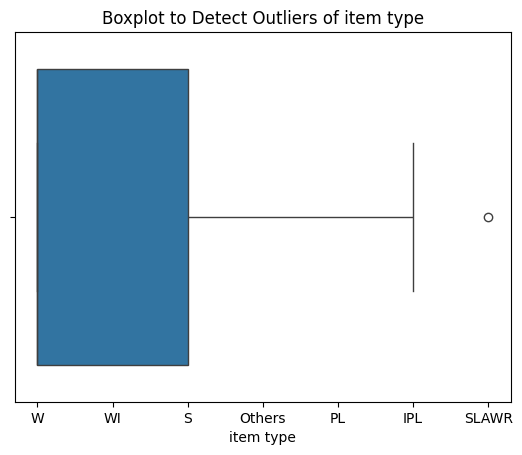

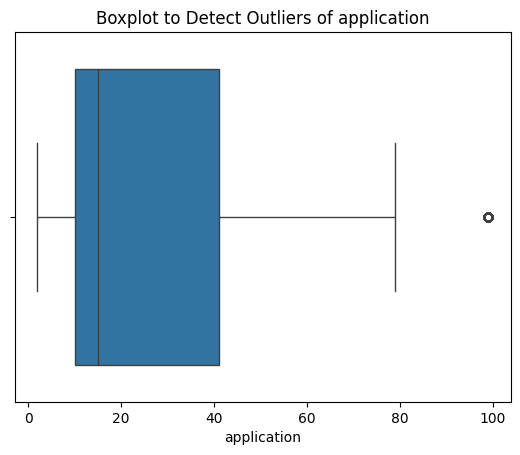

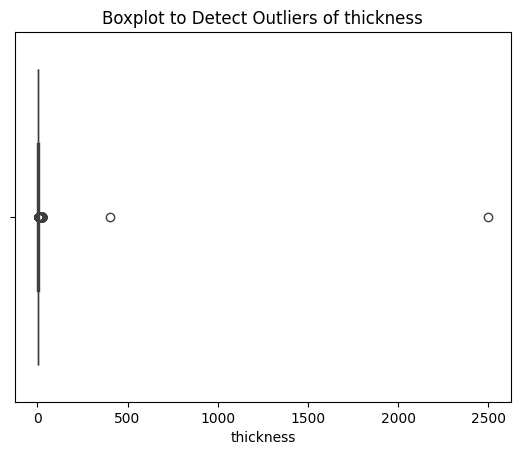

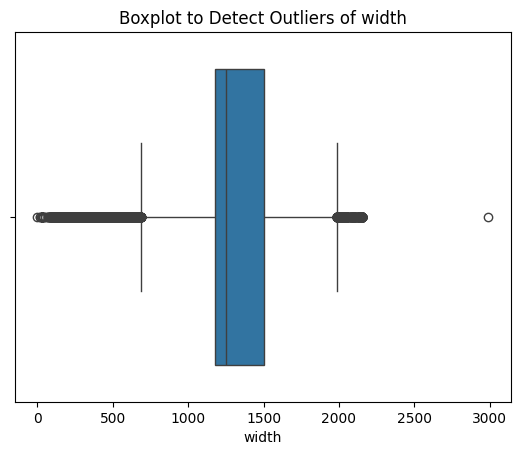

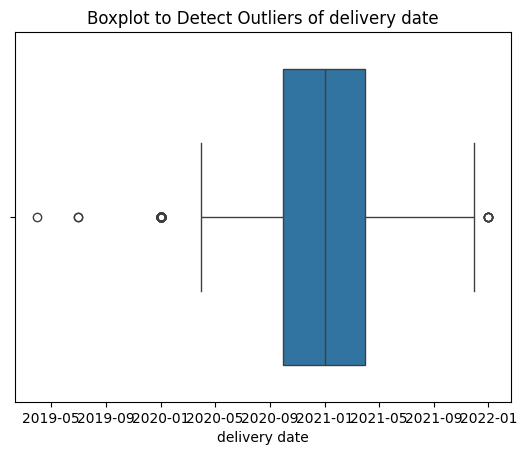

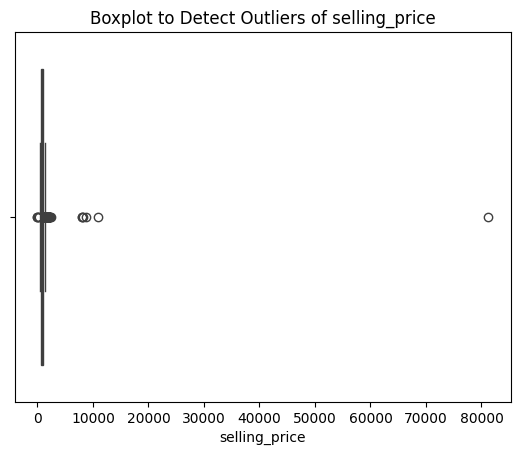

In [45]:
for i in range (len(df4.columns)):
    sns.boxplot(data=df4, x=df4[df4.columns[i]])
    plt.title(f"Boxplot to Detect Outliers of {df4.columns[i]}")
    plt.show()

In [46]:
#Outliers are more in columns quantity tons, thickness, width, selling_price

In [47]:
#Finding whether the data is in normalization or not

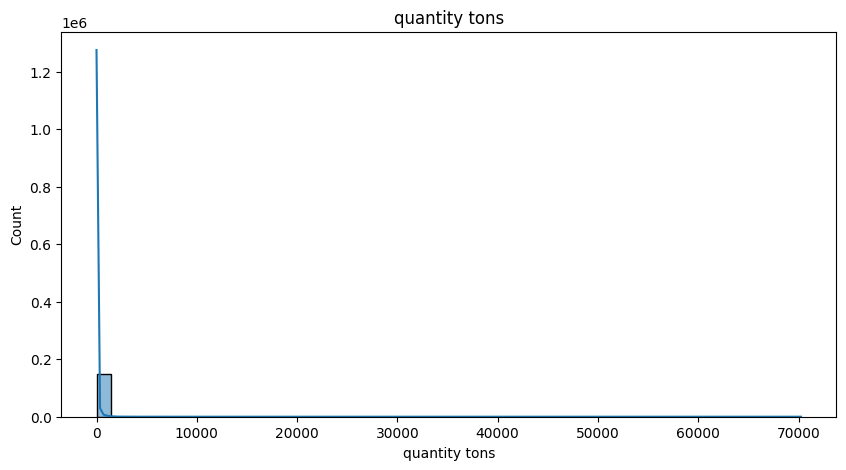

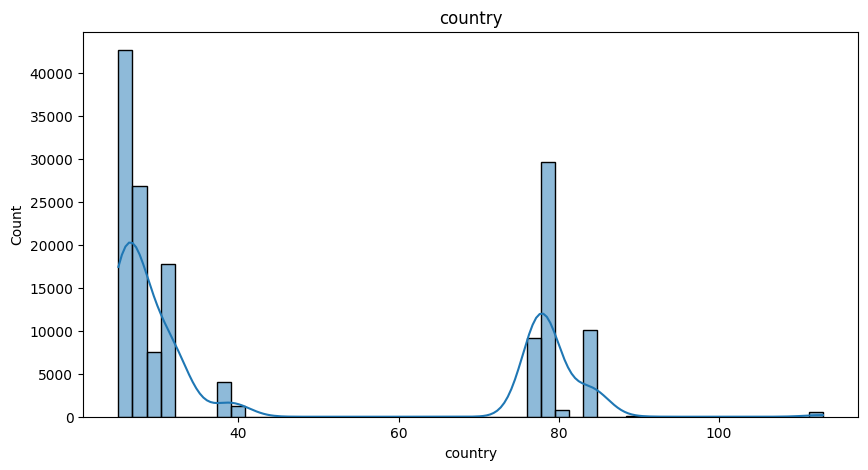

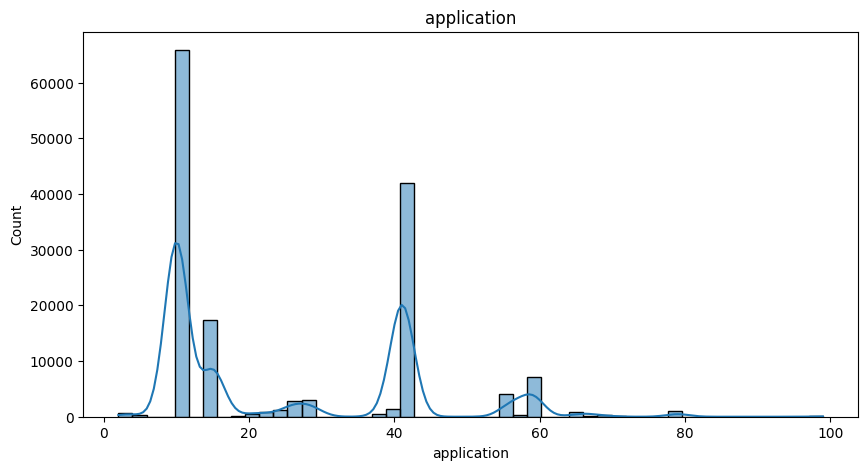

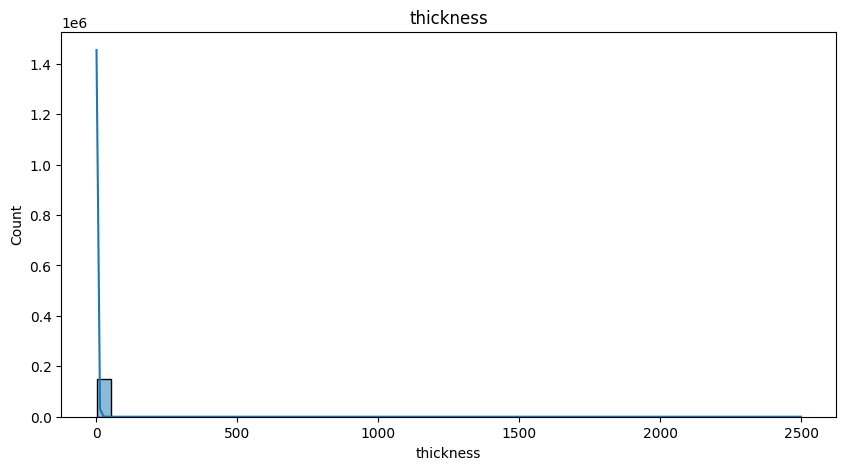

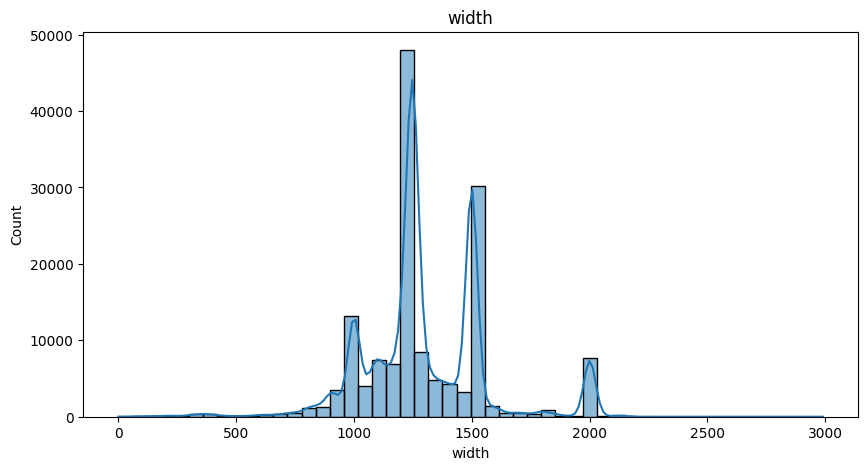

In [48]:
for i in outlier_Detection_columns:
    plt.figure(figsize=(10,5))
    sns.histplot(data=df4[outlier_Detection_columns],x=i,bins=50,kde=True)
    plt.title(i)
    plt.show()

In [49]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150437 entries, 0 to 181672
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   item_date      150437 non-null  datetime64[ns]
 1   quantity tons  150437 non-null  float64       
 2   country        150437 non-null  float64       
 3   status         150437 non-null  object        
 4   item type      150437 non-null  object        
 5   application    150437 non-null  float64       
 6   thickness      150437 non-null  float64       
 7   width          150437 non-null  float64       
 8   delivery date  150437 non-null  datetime64[ns]
 9   selling_price  150437 non-null  float64       
dtypes: datetime64[ns](2), float64(6), object(2)
memory usage: 12.6+ MB


In [250]:
df4.head(5)

,item_date,quantity tons,country,status,item type,application,thickness,width,delivery date,selling_price,quantity tons in kg
0,2021-04-01,54.151139,28.0,Won,W,10.0,2.00,1500.0,2021-07-01,854.00,54151.13862
1,2021-04-01,768.024839,25.0,Won,W,41.0,0.80,1210.0,2021-04-01,1047.00,768024.83920
2,2021-04-01,386.127949,30.0,Won,WI,28.0,0.38,952.0,2021-01-01,644.33,386127.94890
3,2021-04-01,202.411065,32.0,Won,S,59.0,2.30,1317.0,2021-01-01,768.00,202411.06540
4,2021-04-01,785.526262,28.0,Won,W,10.0,4.00,2000.0,2021-03-01,577.00,785526.26160


In [50]:
df4['quantity tons in kg'] = df4['quantity tons']* 1000

C:\Users\HP USER\AppData\Local\Temp\ipykernel_10316\155831776.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['quantity tons in kg'] = df4['quantity tons']* 1000


In [51]:
df5=df4.copy()

In [52]:
df5['quantity_tons_kg_log']=np.log(df5['quantity tons in kg'])
df5['thickness_log']=np.log(df5['thickness'])
df5['width_log'] = np.log(df5['width'])
df5['selling_price_log']=np.log(df5['selling_price'])

C:\Users\HP USER\AppData\Roaming\Python\Python312\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [53]:
df5.info()


<class 'pandas.core.frame.DataFrame'>
Index: 150437 entries, 0 to 181672
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   item_date             150437 non-null  datetime64[ns]
 1   quantity tons         150437 non-null  float64       
 2   country               150437 non-null  float64       
 3   status                150437 non-null  object        
 4   item type             150437 non-null  object        
 5   application           150437 non-null  float64       
 6   thickness             150437 non-null  float64       
 7   width                 150437 non-null  float64       
 8   delivery date         150437 non-null  datetime64[ns]
 9   selling_price         150437 non-null  float64       
 10  quantity tons in kg   150437 non-null  float64       
 11  quantity_tons_kg_log  150437 non-null  float64       
 12  thickness_log         150437 non-null  float64       
 13  widt

In [54]:
#normalisation chart after log transformation

In [55]:
col1 = [ "quantity_tons_kg_log", 'selling_price_log','thickness_log', 'width_log' ]
col2 = [ "quantity tons in kg", 'selling_price','thickness','width' ]

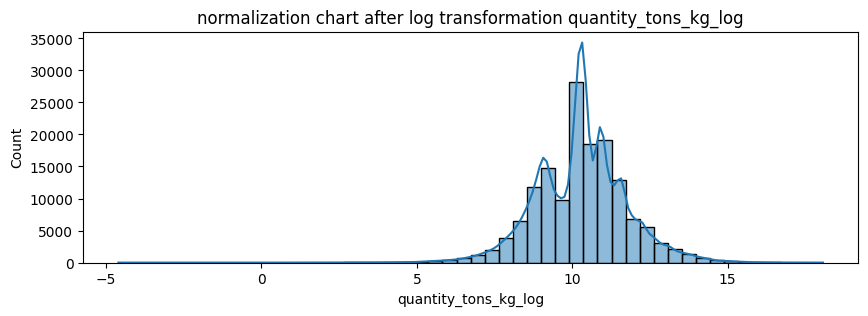

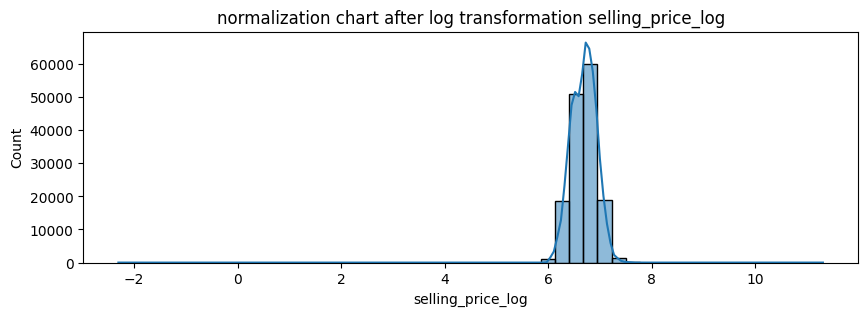

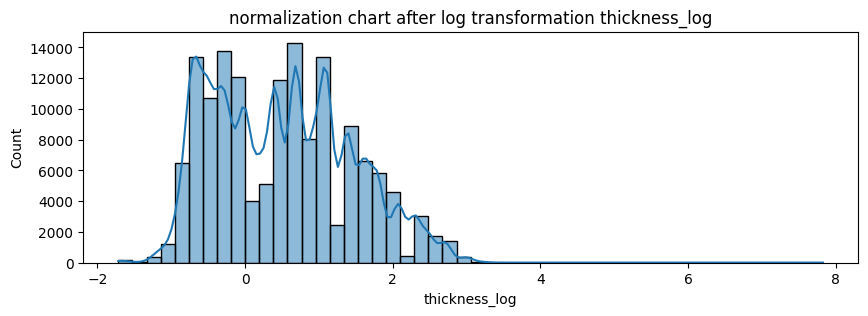

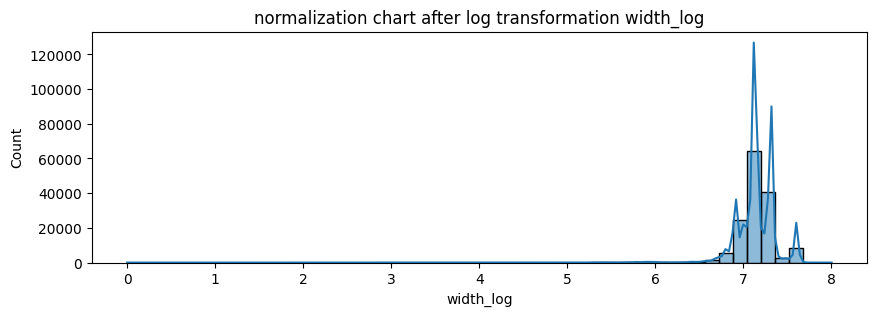

In [56]:
for i in col1:
    plt.figure(figsize=(10,3))
    sns.histplot(data=df5,x=i,bins=50,kde=True)
    plt.title(f'normalization chart after log transformation {i}')
    plt.show()

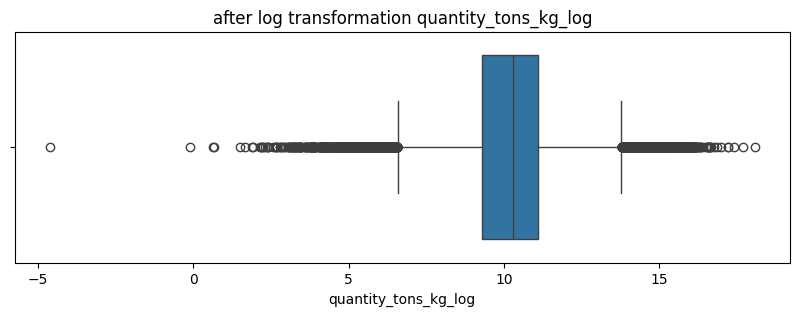

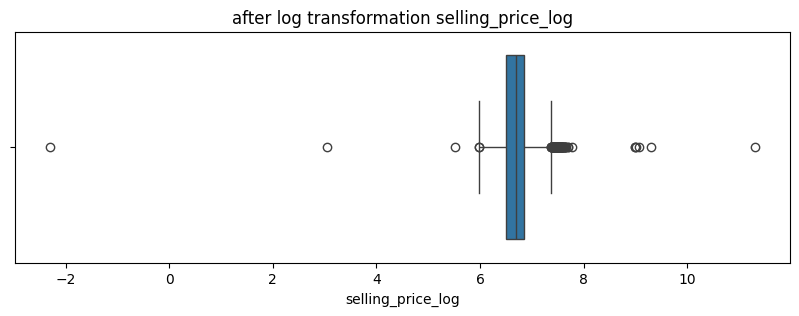

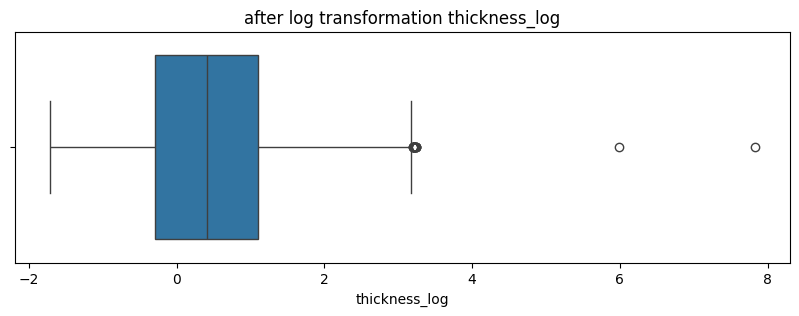

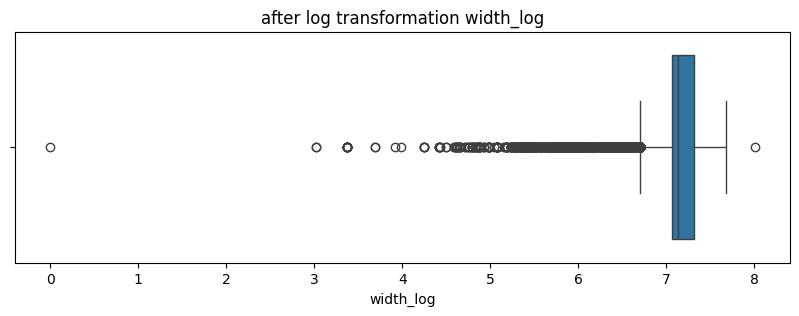

In [57]:
#outlier detection after log transformation
for i in col1:
    plt.figure(figsize=(10,3))
    sns.boxplot(data=df5,x=i)
    plt.title(f'after log transformation {i}')
    plt.show()

In [58]:
def distribution_chart_compare(df,col1,col2):
    for col1,col2 in zip(col1,col2):
        fig, axs = plt.subplots( 1,2,figsize=(10,5))
        sns.histplot(data=df, x=col1, kde=True, bins=20,ax= axs[0])
        sns.histplot(data=df, x=col2, kde=True, bins=20,ax= axs[1])
        axs[0].set_title(f"{col1} after log transformation")
        axs[1].set_title(f"{col2} before log transformation")
        plt.tight_layout()
        plt.show()
        

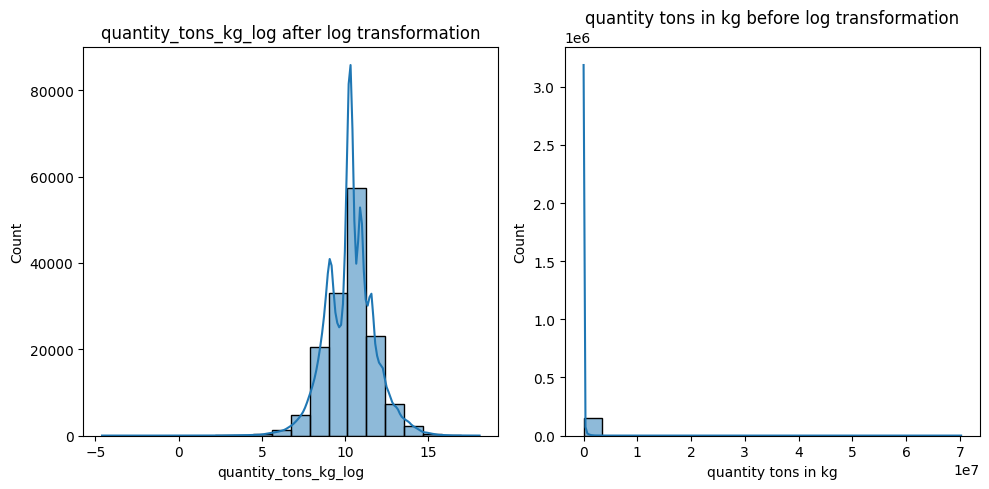

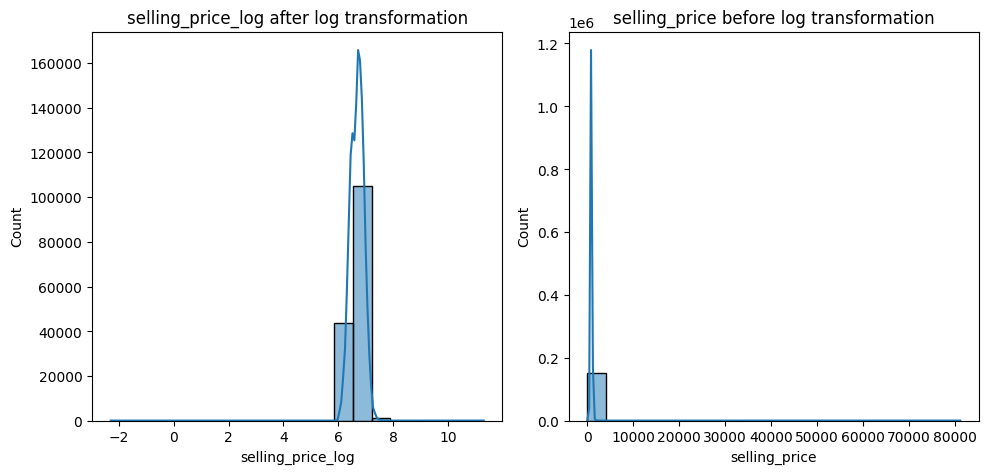

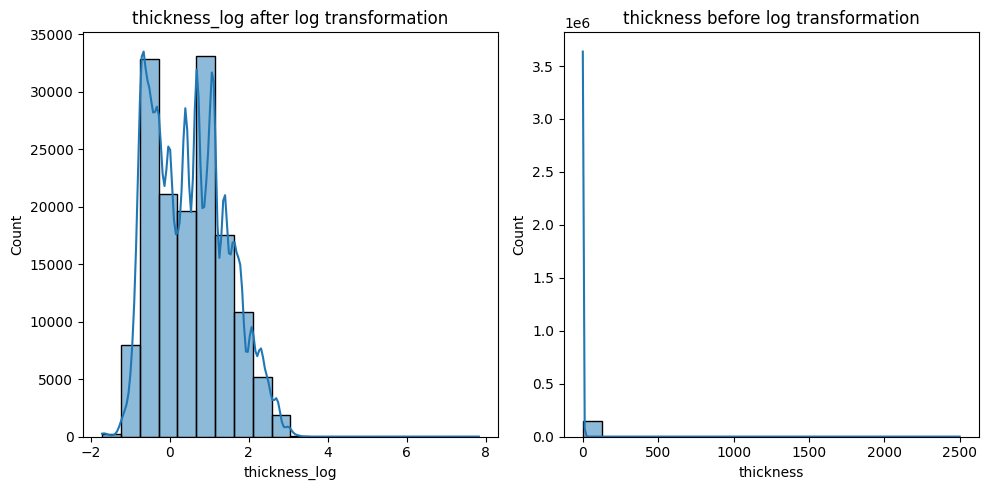

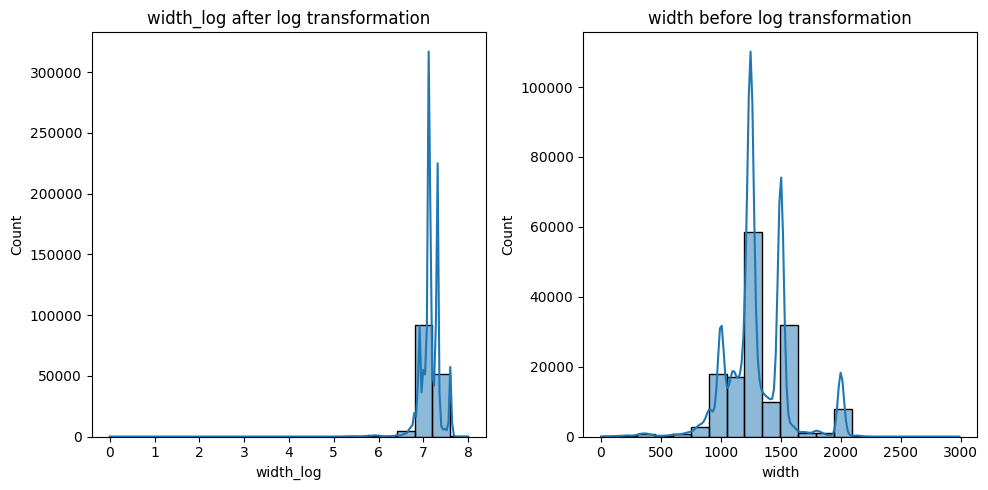

In [59]:
distribution_chart_compare(df5,col1,col2)

In [60]:
def dis_compare_boxplot_chart(df,col1,col2):
    for col1,col2 in zip(col1,col2):
        fig, axs = plt.subplots( 1,2,figsize=(10,5))
        sns.boxplot(data=df, x=col1, ax=axs[0])
        sns.boxplot(data=df, x=col2, ax=axs[1])
        axs[0].set_title(f"{col1} after log transformation")
        axs[1].set_title(f"{col2} before log transformation")
        plt.tight_layout()
        plt.show()

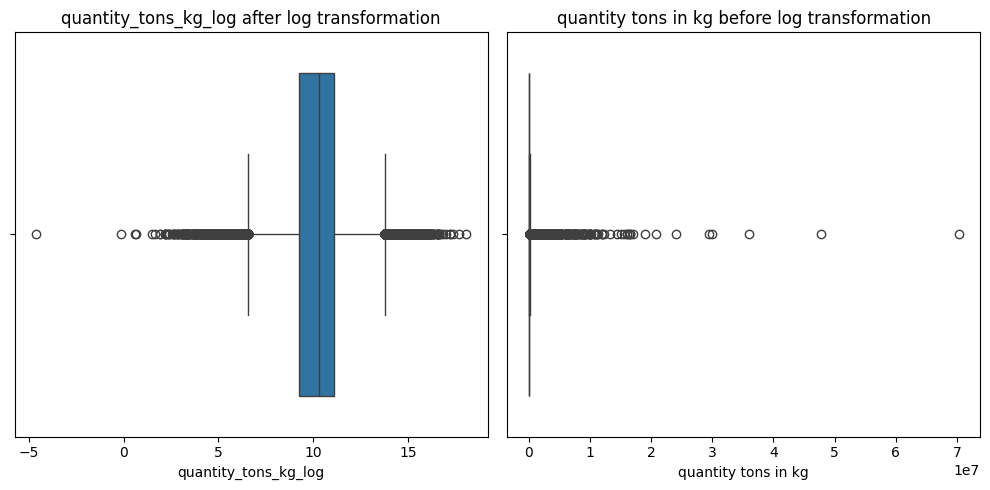

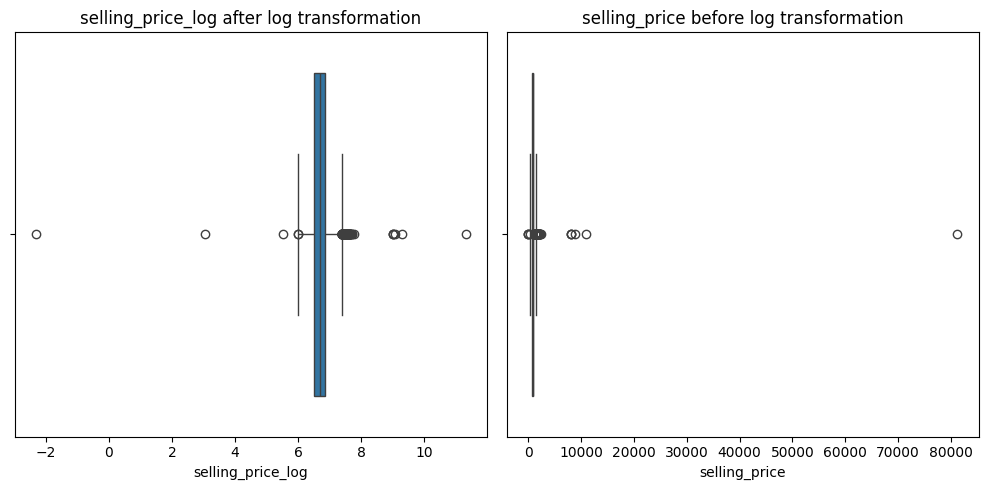

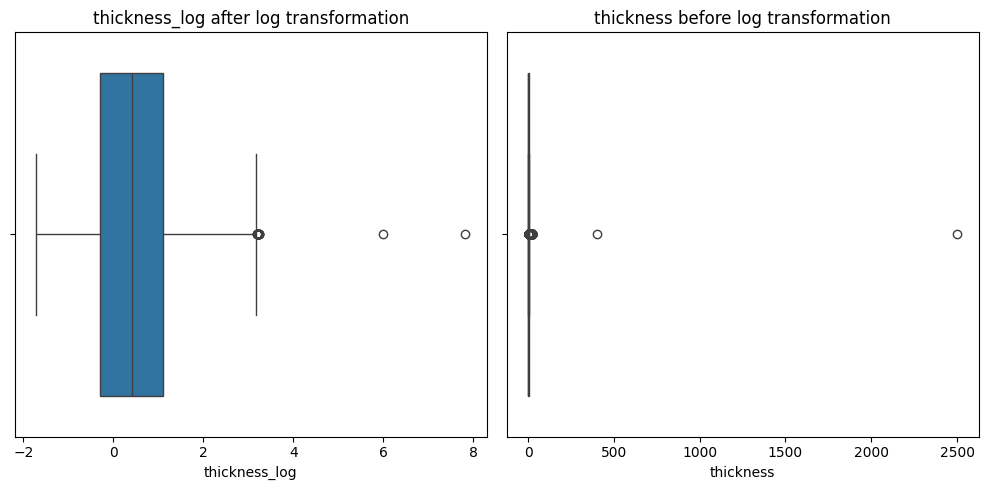

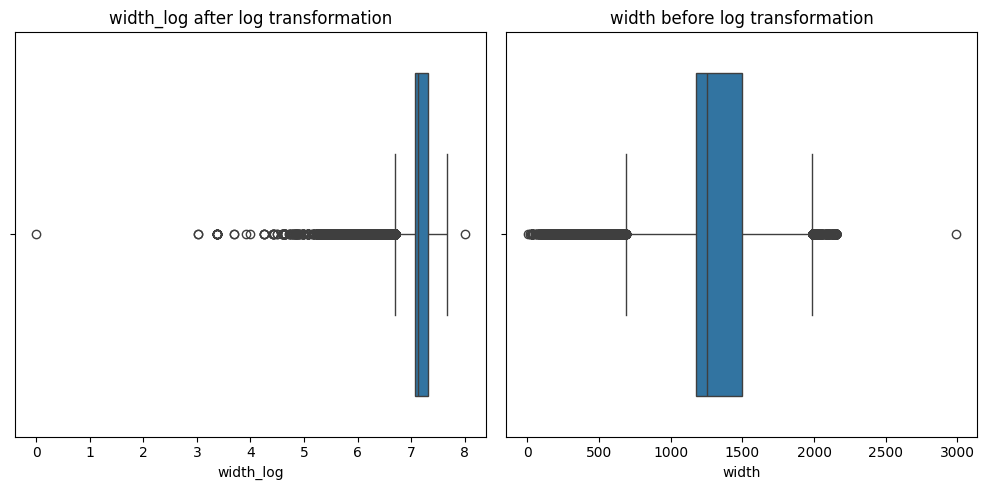

In [61]:
dis_compare_boxplot_chart(df5,col1,col2)

In [62]:
df5.isnull().sum()

item_date               0
quantity tons           0
country                 0
status                  0
item type               0
application             0
thickness               0
width                   0
delivery date           0
selling_price           0
quantity tons in kg     0
quantity_tons_kg_log    0
thickness_log           0
width_log               0
selling_price_log       0
dtype: int64

In [63]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150437 entries, 0 to 181672
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   item_date             150437 non-null  datetime64[ns]
 1   quantity tons         150437 non-null  float64       
 2   country               150437 non-null  float64       
 3   status                150437 non-null  object        
 4   item type             150437 non-null  object        
 5   application           150437 non-null  float64       
 6   thickness             150437 non-null  float64       
 7   width                 150437 non-null  float64       
 8   delivery date         150437 non-null  datetime64[ns]
 9   selling_price         150437 non-null  float64       
 10  quantity tons in kg   150437 non-null  float64       
 11  quantity_tons_kg_log  150437 non-null  float64       
 12  thickness_log         150437 non-null  float64       
 13  widt

In [64]:
df6=df5.drop(columns=['quantity tons','thickness','width','selling_price','quantity tons in kg'])

In [65]:
categorical_columns = [i for i in df6.columns if df6[i].dtype== "object"]
numerical_columns = [i for i in df6.columns if df6[i].dtype== "float64" or df6[i].dtype==  "int64"]

In [66]:
numerical_columns

['country',
 'application',
 'quantity_tons_kg_log',
 'thickness_log',
 'width_log',
 'selling_price_log']

In [67]:
categorical_columns

['status', 'item type']

In [68]:
df6.describe()

C:\Users\HP USER\AppData\Roaming\Python\Python312\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,item_date,country,application,delivery date,quantity_tons_kg_log,thickness_log,width_log,selling_price_log
count,150437,150437.000000,150437.000000,150437,150437.000000,150437.000000,150437.000000,1.504370e+05
mean,2020-11-27 03:45:57.558313728,45.392277,25.194141,2021-01-23 17:54:43.115190784,10.280954,0.504878,7.144851,-inf
min,2020-07-02 00:00:00,25.000000,2.000000,2019-04-01 00:00:00,-4.605170,-1.714798,0.000000,-inf
25%,2020-09-29 00:00:00,26.000000,10.000000,2020-10-01 00:00:00,9.277968,-0.301105,7.069874,6.508769e+00
50%,2020-12-01 00:00:00,30.000000,15.000000,2021-01-01 00:00:00,10.306775,0.405465,7.130899,6.698268e+00
75%,2021-02-03 00:00:00,78.000000,41.000000,2021-04-01 00:00:00,11.080089,1.098612,7.313220,6.857514e+00
max,2021-04-01 00:00:00,113.000000,99.000000,2022-01-01 00:00:00,18.067605,7.824046,8.003029,1.130512e+01
std,NaN,24.488553,17.639978,NaN,1.441692,0.931567,0.232816,NaN


In [69]:
index_to_drop_selling_price_log = df6[df6['selling_price_log'] < 0].index
index_to_drop_quanitiy_tons_kg_log = df6[(df6['quantity_tons_kg_log']<0)].index
index_to_drop_selling_price_log
index_to_drop_quanitiy_tons_kg_log

Index([160036, 173317], dtype='int64')

In [70]:
df6 = df6.drop(index_to_drop_selling_price_log)
df7 = df6.drop(index_to_drop_quanitiy_tons_kg_log)

In [71]:
df7.describe().T

,count,mean,min,25%,50%,75%,max,std
item_date,150433,2020-11-27 03:46:28.358937344,2020-07-02 00:00:00,2020-09-29 00:00:00,2020-12-01 00:00:00,2021-02-03 00:00:00,2021-04-01 00:00:00,NaN
country,150433.0,45.392367,25.0,26.0,30.0,78.0,113.0,24.488638
application,150433.0,25.1941,2.0,10.0,15.0,41.0,99.0,17.640055
delivery date,150433,2021-01-23 17:55:54.899523584,2019-04-01 00:00:00,2020-10-01 00:00:00,2021-01-01 00:00:00,2021-04-01 00:00:00,2022-01-01 00:00:00,NaN
quantity_tons_kg_log,150433.0,10.28111,0.624741,9.278005,10.306775,11.080089,18.067605,1.440947
thickness_log,150433.0,0.504824,-1.714798,-0.301105,0.405465,1.098612,5.991465,0.931368
width_log,150433.0,7.144847,0.0,7.069874,7.130899,7.31322,8.003029,0.232816
selling_price_log,150433.0,6.687027,3.044999,6.508769,6.698268,6.857588,11.305116,0.239979


In [72]:
def IQR_outlier_detection(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [73]:
col_outlier_1=['quantity_tons_kg_log','thickness_log','width_log']

In [74]:
outlier_indices = set()

for col in col_outlier_1:
    outliers = IQR_outlier_detection(df7, col)
    outlier_indices.update(outliers.index)
    print(outliers)
    print(outlier_indices)  
    print(len(outlier_indices))

        item_date  country status item type  application delivery date  \
191    2021-04-01     30.0    Won         S         41.0    2021-09-01   
265    2021-04-01     25.0    Won         W         26.0    2021-07-01   
300    2021-04-01     77.0    Won         W         15.0    2021-05-01   
571    2021-04-01     32.0    Won         W         10.0    2021-09-01   
593    2021-04-01     78.0    Won         W         41.0    2021-06-01   
...           ...      ...    ...       ...          ...           ...   
181631 2020-07-02     25.0    Won         W         41.0    2020-07-01   
181635 2020-07-02     25.0    Won         W         41.0    2020-07-01   
181645 2020-07-02     25.0    Won         W         41.0    2020-07-01   
181651 2020-07-02     25.0    Won         W         41.0    2020-07-01   
181663 2020-07-02     25.0    Won         W         41.0    2020-07-01   

        quantity_tons_kg_log  thickness_log  width_log  selling_price_log  
191                14.883318      -

In [75]:
def IQR_outlier_detection(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers
    
outlier_SP = IQR_outlier_detection(df7, 'selling_price_log')
pd.set_option('display.max_rows', None)
print(outlier_SP)

        item_date  country status item type  application delivery date  \
361    2021-04-01     28.0    Won         W         10.0    2021-08-01   
363    2021-04-01     28.0    Won         W         10.0    2021-08-01   
403    2021-04-01     32.0    Won         W         42.0    2021-07-01   
405    2021-04-01     32.0    Won         W         42.0    2021-07-01   
409    2021-04-01     32.0   Lost         W         20.0    2021-07-01   
413    2021-04-01     32.0   Lost         W         20.0    2021-07-01   
415    2021-04-01     32.0   Lost         W         20.0    2021-07-01   
433    2021-04-01     32.0    Won         S         41.0    2021-09-01   
591    2021-04-01     25.0    Won         W         10.0    2021-07-01   
963    2021-03-31     25.0    Won         W         42.0    2021-07-01   
1146   2021-03-31     28.0    Won         W         41.0    2021-07-01   
1176   2021-03-31     28.0    Won         W         41.0    2021-07-01   
1198   2021-03-31     28.0    Won     

In [76]:
# Drop outliers from DataFrame
df8_without_outlier = df7.drop(index=outlier_indices)

# Print cleaned DataFrame
print(df8_without_outlier.head(20))

    item_date  country status item type  application delivery date  \
0  2021-04-01     28.0    Won         W         10.0    2021-07-01   
1  2021-04-01     25.0    Won         W         41.0    2021-04-01   
2  2021-04-01     30.0    Won        WI         28.0    2021-01-01   
3  2021-04-01     32.0    Won         S         59.0    2021-01-01   
4  2021-04-01     28.0    Won         W         10.0    2021-03-01   
5  2021-04-01     25.0    Won         W         41.0    2021-04-01   
7  2021-04-01     32.0    Won         W         41.0    2021-01-01   
8  2021-04-01     38.0    Won         S         10.0    2021-07-01   
9  2021-04-01     25.0    Won         W         41.0    2021-04-01   
11 2021-04-01     32.0    Won         W         41.0    2021-01-01   
12 2021-04-01     78.0    Won         W         10.0    2021-07-01   
13 2021-04-01     27.0    Won         S         10.0    2021-07-01   
15 2021-04-01     32.0    Won         S         41.0    2021-01-01   
16 2021-04-01     30

In [77]:
def outlier_compare_boxchart(df1,df2, col1):
    for i in col1:
        fig, axs = plt.subplots( 1,2,figsize=(10,5))
        sns.boxplot(data=df1, x=i,ax= axs[0])
        sns.boxplot(data=df2, x=i, ax= axs[1])
        axs[0].set_title(f"{i} before outlier treatment")
        axs[1].set_title(f"{i} after outlier treatment")
        plt.tight_layout()
        plt.show()

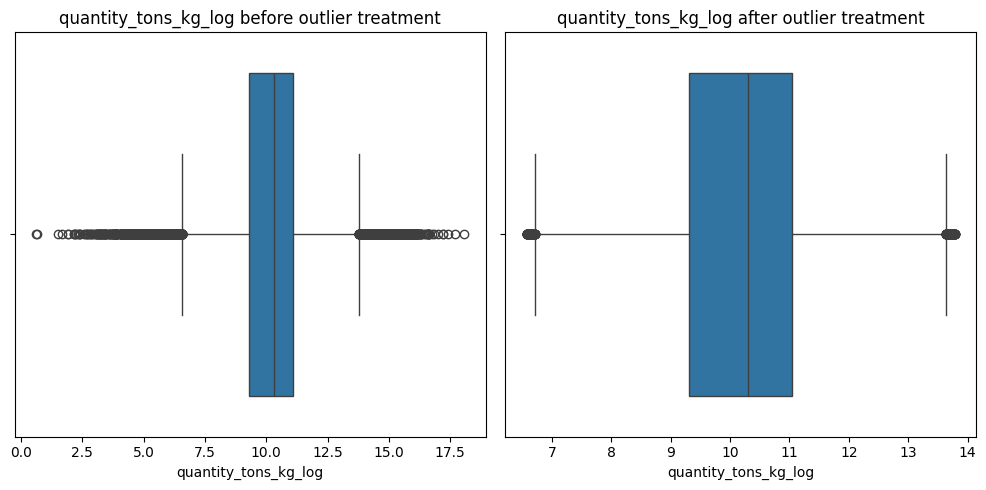

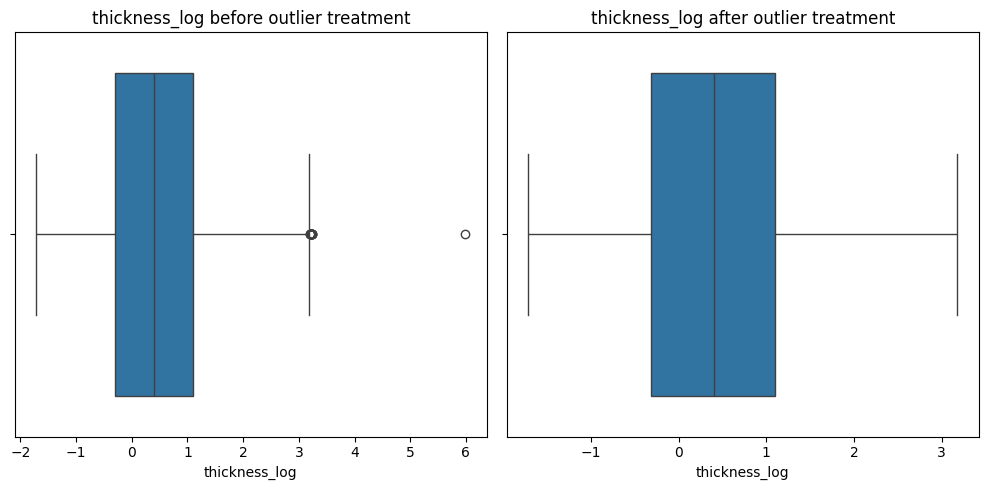

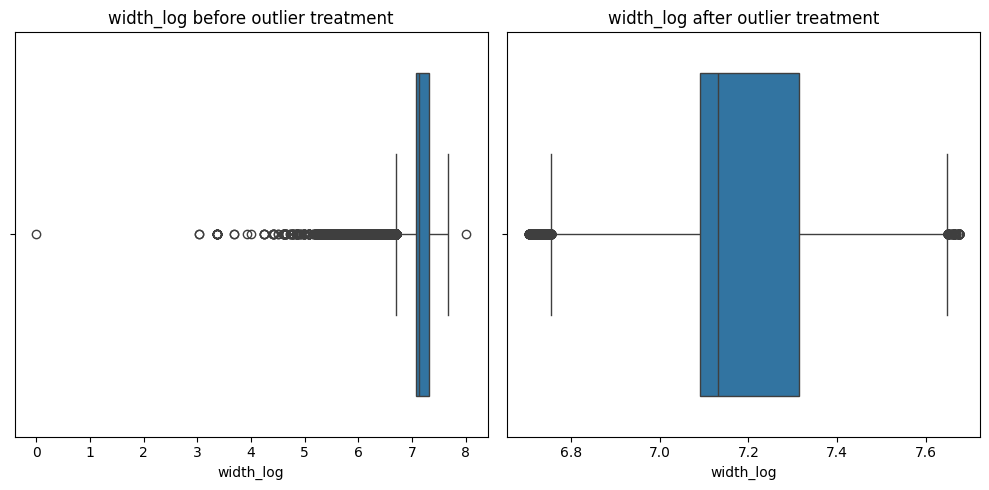

In [78]:
outlier_compare_boxchart(df7,df8_without_outlier,col_outlier_1)

In [79]:
df8_without_outlier.describe()

,item_date,country,application,delivery date,quantity_tons_kg_log,thickness_log,width_log,selling_price_log
count,143785,143785.000000,143785.000000,143785,143785.000000,143785.000000,143785.000000,143785.000000
mean,2020-11-27 07:09:36.686024448,45.596613,24.869347,2021-01-24 09:41:26.888061952,10.270915,0.505484,7.164483,6.687798
min,2020-07-02 00:00:00,25.000000,2.000000,2019-04-01 00:00:00,6.576166,-1.714798,6.705639,3.044999
25%,2020-09-29 00:00:00,26.000000,10.000000,2020-11-01 00:00:00,9.308329,-0.314711,7.090077,6.508769
50%,2020-12-01 00:00:00,30.000000,15.000000,2021-01-01 00:00:00,10.306603,0.405465,7.130899,6.699500
75%,2021-02-03 00:00:00,78.000000,41.000000,2021-04-01 00:00:00,11.040326,1.098612,7.313220,6.858565
max,2021-04-01 00:00:00,113.000000,99.000000,2021-11-01 00:00:00,13.782642,3.178054,7.673223,11.305116
std,NaN,24.568267,17.442800,NaN,1.293659,0.934674,0.178773,0.239648


In [80]:
#days taken to deliver the product is also one of the major criteria for the price of that product

In [81]:
df8_without_outlier['days_taken_for_delivery'] = (df8_without_outlier['delivery date'] - df8_without_outlier['item_date']).dt.days

In [82]:
df8_without_outlier.head(10)

,item_date,country,status,item type,application,delivery date,quantity_tons_kg_log,thickness_log,width_log,selling_price_log,days_taken_for_delivery
0,2021-04-01,28.0,Won,W,10.0,2021-07-01,10.899534,0.693147,7.313220,6.749931,91
1,2021-04-01,25.0,Won,W,41.0,2021-04-01,13.551577,-0.223144,7.098376,6.953684,0
2,2021-04-01,30.0,Won,WI,28.0,2021-01-01,12.863924,-0.967584,6.858565,6.468211,-90
3,2021-04-01,32.0,Won,S,59.0,2021-01-01,12.218056,0.832909,7.183112,6.643790,-90
4,2021-04-01,28.0,Won,W,10.0,2021-03-01,13.574109,1.386294,7.600902,6.357842,-31
5,2021-04-01,25.0,Won,W,41.0,2021-04-01,12.327364,0.405465,7.142827,6.890609,0
7,2021-04-01,32.0,Won,W,41.0,2021-01-01,11.638563,-0.385662,7.106606,6.836259,-90
8,2021-04-01,38.0,Won,S,10.0,2021-07-01,11.142903,-0.510826,7.150701,7.217443,91
9,2021-04-01,25.0,Won,W,41.0,2021-04-01,13.354470,0.405465,7.060476,6.890609,0
11,2021-04-01,32.0,Won,W,41.0,2021-01-01,11.643916,-0.597837,7.106606,6.860664,-90


In [83]:
df9=df8_without_outlier.copy()

In [84]:
(df9[['days_taken_for_delivery']]< 0).value_counts()

days_taken_for_delivery
False                      130168
True                        13617
Name: count, dtype: int64

In [85]:
#there are 13617 days which are less than and equal to Zero 

In [86]:
to_be_dropped = df9['days_taken_for_delivery'] < 0
df10 = df9[~to_be_dropped].reset_index(drop=True)
df10.head(10)

,item_date,country,status,item type,application,delivery date,quantity_tons_kg_log,thickness_log,width_log,selling_price_log,days_taken_for_delivery
0,2021-04-01,28.0,Won,W,10.0,2021-07-01,10.899534,0.693147,7.313220,6.749931,91
1,2021-04-01,25.0,Won,W,41.0,2021-04-01,13.551577,-0.223144,7.098376,6.953684,0
2,2021-04-01,25.0,Won,W,41.0,2021-04-01,12.327364,0.405465,7.142827,6.890609,0
3,2021-04-01,38.0,Won,S,10.0,2021-07-01,11.142903,-0.510826,7.150701,7.217443,91
4,2021-04-01,25.0,Won,W,41.0,2021-04-01,13.354470,0.405465,7.060476,6.890609,0
5,2021-04-01,78.0,Won,W,10.0,2021-07-01,10.222397,-0.287682,7.130899,7.001246,91
6,2021-04-01,27.0,Won,S,10.0,2021-07-01,10.380818,-0.510826,6.917706,6.880384,91
7,2021-04-01,30.0,Won,W,41.0,2021-04-01,11.226901,-0.519194,7.142827,7.057777,0
8,2021-04-01,30.0,Won,W,10.0,2021-07-01,9.943050,-0.798508,6.802395,7.181736,91
9,2021-04-01,30.0,Won,W,41.0,2021-04-01,11.175591,-0.519194,7.142827,7.057304,0


In [87]:
df10.describe().T

,count,mean,min,25%,50%,75%,max,std
item_date,130168,2020-12-04 03:17:26.745743872,2020-07-02 00:00:00,2020-10-05 00:00:00,2020-12-07 00:00:00,2021-02-10 00:00:00,2021-04-01 00:00:00,NaN
country,130168.0,46.204513,25.0,26.0,32.0,78.0,113.0,24.740027
application,130168.0,24.071123,2.0,10.0,15.0,41.0,99.0,17.303501
delivery date,130168,2021-02-08 15:04:46.079527936,2020-08-01 00:00:00,2020-12-01 00:00:00,2021-02-01 00:00:00,2021-04-01 00:00:00,2021-11-01 00:00:00,NaN
quantity_tons_kg_log,130168.0,10.27489,6.576166,9.328766,10.308984,11.029987,13.782642,1.287845
thickness_log,130168.0,0.539237,-1.714798,-0.287682,0.405465,1.098612,3.178054,0.932674
width_log,130168.0,7.16782,6.705639,7.090077,7.130899,7.31322,7.673223,0.181245
selling_price_log,130168.0,6.694972,3.044999,6.519147,6.705639,6.862758,9.29771,0.237283
days_taken_for_delivery,130168.0,66.491196,0.0,33.0,64.0,99.0,240.0,39.125184


In [88]:
#By converting item date and delivery date  into day, month and year so that it helps our alogrithm to predict properly
df10['item_date_day'] = df10['item_date'].dt.day
df10['item_date_month'] = df10['item_date'].dt.month
df10['item_date_year'] = df10['item_date'].dt.year
df10['delivery date_day'] = df10['delivery date'].dt.day
df10['delivery date_month'] = df10['delivery date'].dt.month
df10['delivery date_year'] = df10['delivery date'].dt.year

In [89]:
df10.head(10)

,item_date,country,status,item type,application,delivery date,quantity_tons_kg_log,thickness_log,width_log,selling_price_log,days_taken_for_delivery,item_date_day,item_date_month,item_date_year,delivery date_day,delivery date_month,delivery date_year
0,2021-04-01,28.0,Won,W,10.0,2021-07-01,10.899534,0.693147,7.313220,6.749931,91,1,4,2021,1,7,2021
1,2021-04-01,25.0,Won,W,41.0,2021-04-01,13.551577,-0.223144,7.098376,6.953684,0,1,4,2021,1,4,2021
2,2021-04-01,25.0,Won,W,41.0,2021-04-01,12.327364,0.405465,7.142827,6.890609,0,1,4,2021,1,4,2021
3,2021-04-01,38.0,Won,S,10.0,2021-07-01,11.142903,-0.510826,7.150701,7.217443,91,1,4,2021,1,7,2021
4,2021-04-01,25.0,Won,W,41.0,2021-04-01,13.354470,0.405465,7.060476,6.890609,0,1,4,2021,1,4,2021
5,2021-04-01,78.0,Won,W,10.0,2021-07-01,10.222397,-0.287682,7.130899,7.001246,91,1,4,2021,1,7,2021
6,2021-04-01,27.0,Won,S,10.0,2021-07-01,10.380818,-0.510826,6.917706,6.880384,91,1,4,2021,1,7,2021
7,2021-04-01,30.0,Won,W,41.0,2021-04-01,11.226901,-0.519194,7.142827,7.057777,0,1,4,2021,1,4,2021
8,2021-04-01,30.0,Won,W,10.0,2021-07-01,9.943050,-0.798508,6.802395,7.181736,91,1,4,2021,1,7,2021
9,2021-04-01,30.0,Won,W,41.0,2021-04-01,11.175591,-0.519194,7.142827,7.057304,0,1,4,2021,1,4,2021


In [90]:
#lets drop columns other than float ,object, and int
df10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130168 entries, 0 to 130167
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   item_date                130168 non-null  datetime64[ns]
 1   country                  130168 non-null  float64       
 2   status                   130168 non-null  object        
 3   item type                130168 non-null  object        
 4   application              130168 non-null  float64       
 5   delivery date            130168 non-null  datetime64[ns]
 6   quantity_tons_kg_log     130168 non-null  float64       
 7   thickness_log            130168 non-null  float64       
 8   width_log                130168 non-null  float64       
 9   selling_price_log        130168 non-null  float64       
 10  days_taken_for_delivery  130168 non-null  int64         
 11  item_date_day            130168 non-null  int32         
 12  item_date_month 

In [91]:
df11 = df10.drop(columns=['item_date','delivery date'])

In [92]:
df11.head(12)

,country,status,item type,application,quantity_tons_kg_log,thickness_log,width_log,selling_price_log,days_taken_for_delivery,item_date_day,item_date_month,item_date_year,delivery date_day,delivery date_month,delivery date_year
0,28.0,Won,W,10.0,10.899534,0.693147,7.313220,6.749931,91,1,4,2021,1,7,2021
1,25.0,Won,W,41.0,13.551577,-0.223144,7.098376,6.953684,0,1,4,2021,1,4,2021
2,25.0,Won,W,41.0,12.327364,0.405465,7.142827,6.890609,0,1,4,2021,1,4,2021
3,38.0,Won,S,10.0,11.142903,-0.510826,7.150701,7.217443,91,1,4,2021,1,7,2021
4,25.0,Won,W,41.0,13.354470,0.405465,7.060476,6.890609,0,1,4,2021,1,4,2021
5,78.0,Won,W,10.0,10.222397,-0.287682,7.130899,7.001246,91,1,4,2021,1,7,2021
6,27.0,Won,S,10.0,10.380818,-0.510826,6.917706,6.880384,91,1,4,2021,1,7,2021
7,30.0,Won,W,41.0,11.226901,-0.519194,7.142827,7.057777,0,1,4,2021,1,4,2021
8,30.0,Won,W,10.0,9.943050,-0.798508,6.802395,7.181736,91,1,4,2021,1,7,2021
9,30.0,Won,W,41.0,11.175591,-0.519194,7.142827,7.057304,0,1,4,2021,1,4,2021


In [93]:
#checking the Normalzation of the dataframe using histplot

In [94]:
df11.describe().T

,count,mean,std,min,25%,50%,75%,max
country,130168.0,46.204513,24.740027,25.000000,26.000000,32.000000,78.000000,113.000000
application,130168.0,24.071123,17.303501,2.000000,10.000000,15.000000,41.000000,99.000000
quantity_tons_kg_log,130168.0,10.274890,1.287845,6.576166,9.328766,10.308984,11.029987,13.782642
thickness_log,130168.0,0.539237,0.932674,-1.714798,-0.287682,0.405465,1.098612,3.178054
width_log,130168.0,7.167820,0.181245,6.705639,7.090077,7.130899,7.313220,7.673223
selling_price_log,130168.0,6.694972,0.237283,3.044999,6.519147,6.705639,6.862758,9.297710
days_taken_for_delivery,130168.0,66.491196,39.125184,0.000000,33.000000,64.000000,99.000000,240.000000
item_date_day,130168.0,15.484121,8.711051,1.000000,8.000000,16.000000,23.000000,31.000000
item_date_month,130168.0,6.675143,4.057034,1.000000,3.000000,8.000000,10.000000,12.000000
item_date_year,130168.0,2020.412828,0.492344,2020.000000,2020.000000,2020.000000,2021.000000,2021.000000


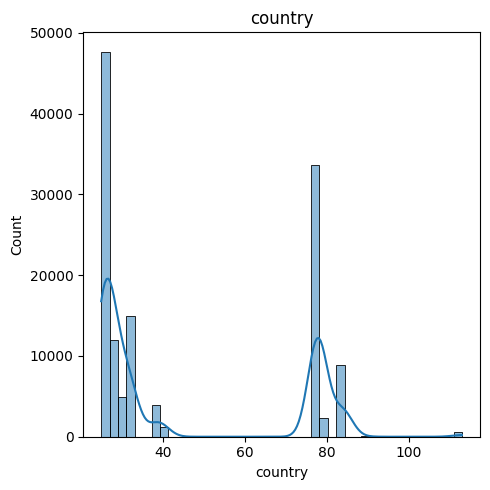

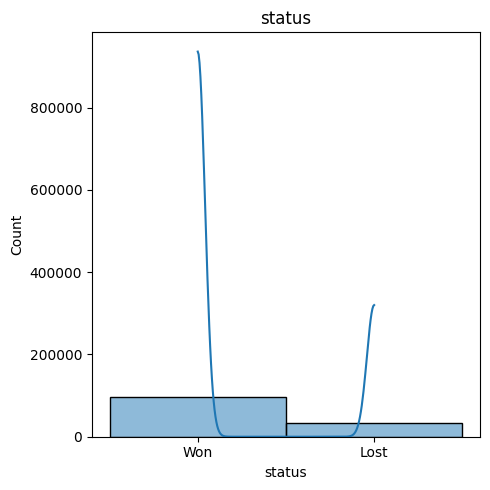

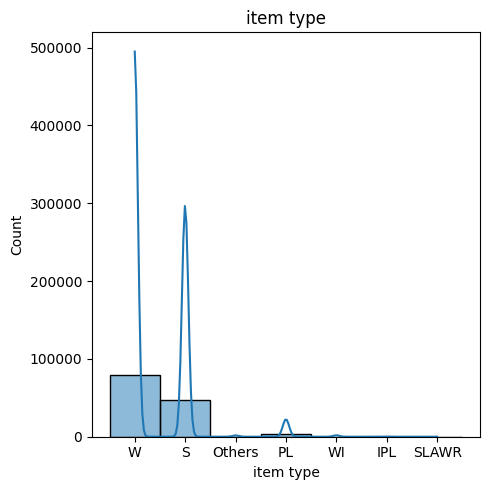

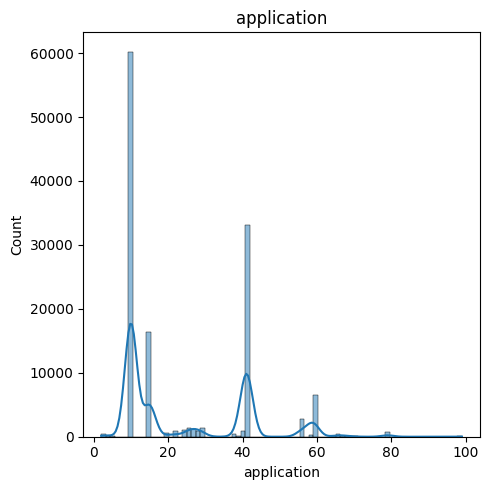

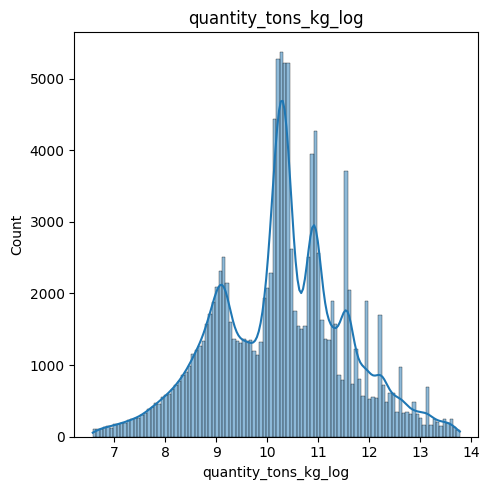

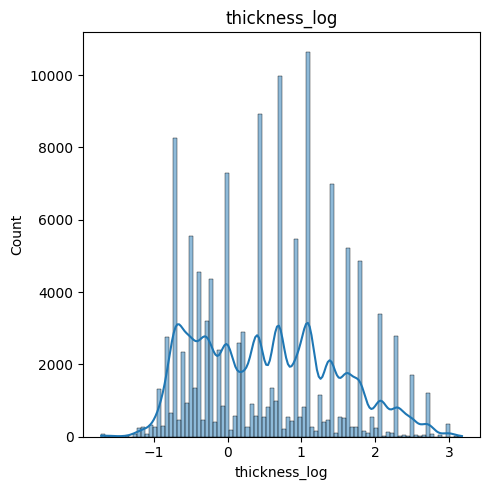

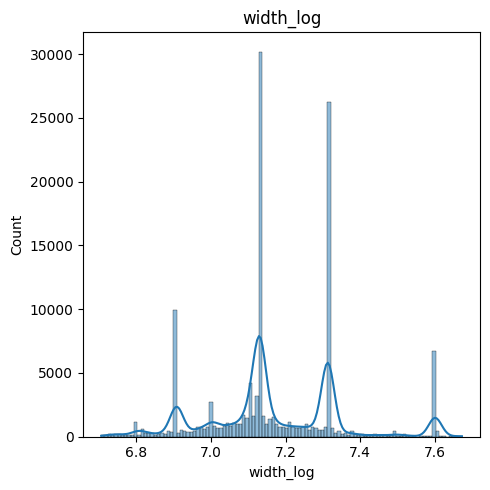

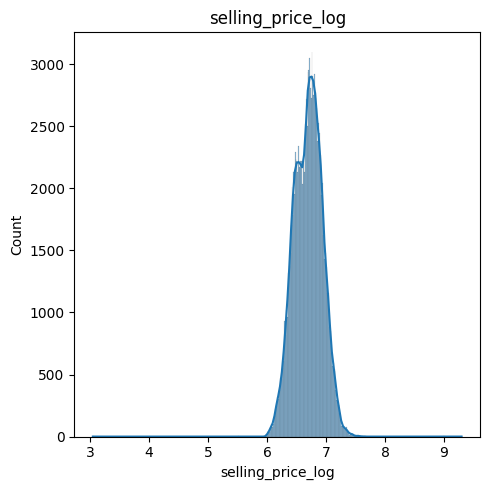

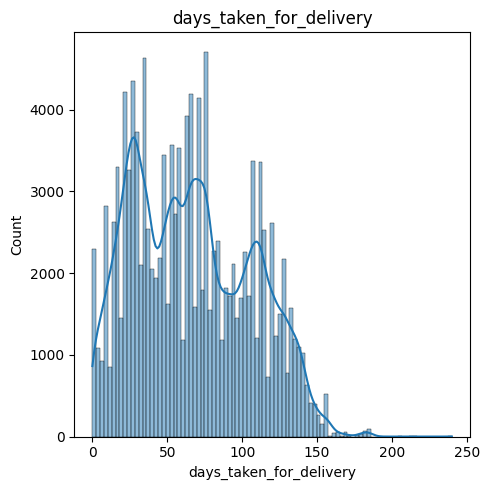

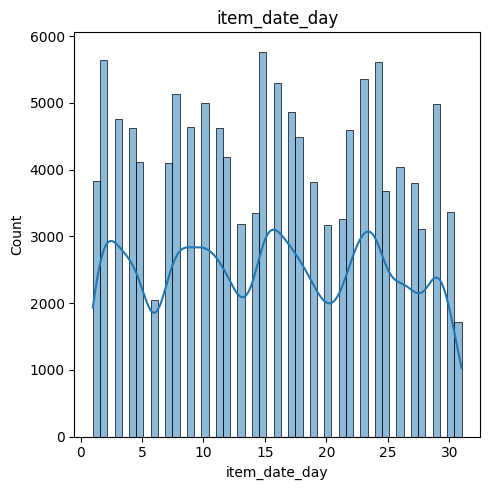

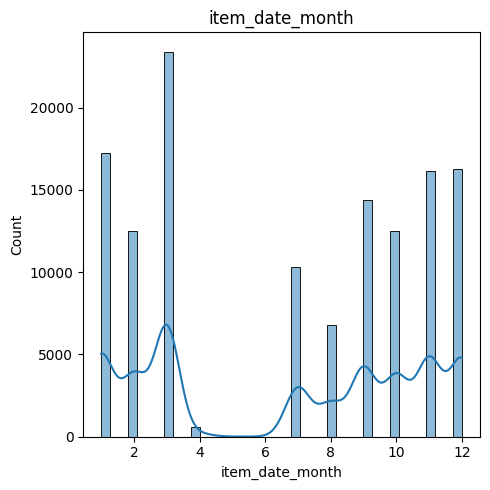

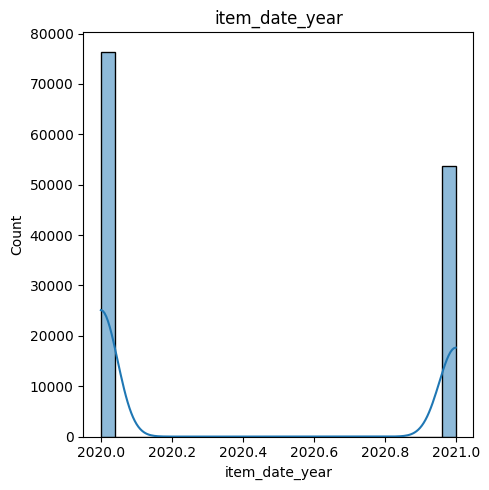

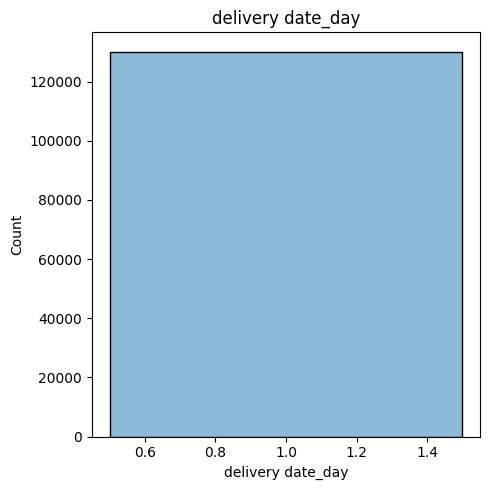

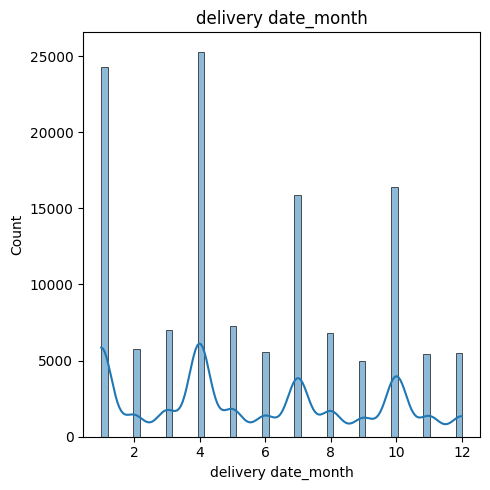

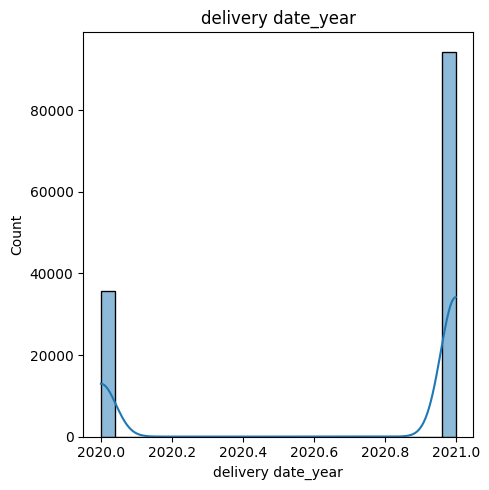

In [95]:
for i in df11.columns:    
    fig, axs = plt.subplots( 1,1,figsize=(5,5))
    sns.histplot(data=df11, x=i,kde=True,ax= axs)
    axs.set_title(i)
    plt.tight_layout()
    plt.show()

In [96]:
#Outlier detection in days_taken_for_delivery

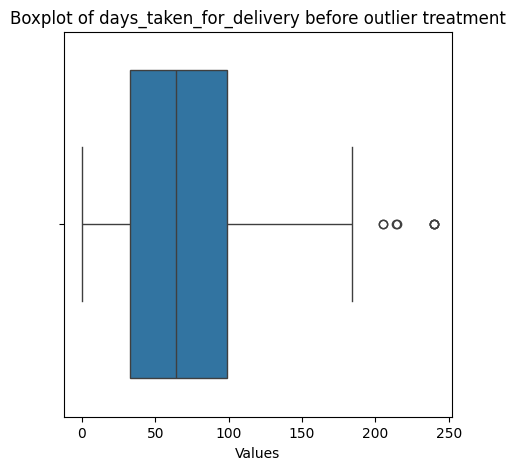

In [97]:
plt.figure(figsize=(5, 5))
sns.boxplot(x=df11['days_taken_for_delivery'])
plt.title('Boxplot of days_taken_for_delivery before outlier treatment')
plt.xlabel('Values')
plt.show()

In [98]:
delivery_days_taken_outlier= IQR_outlier_detection(df11, 'days_taken_for_delivery').index

In [119]:
df12 = df11.drop(index = delivery_days_taken_outlier).reset_index(drop=True)

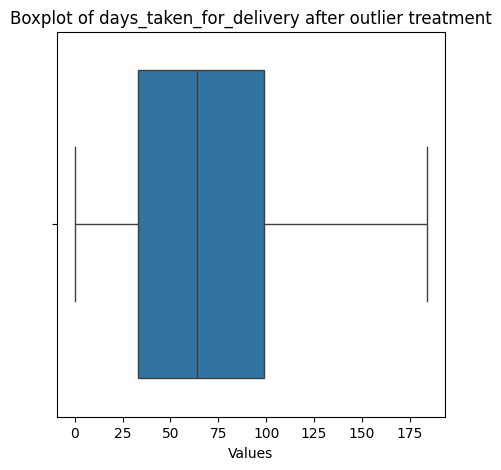

In [120]:
plt.figure(figsize=(5, 5))
sns.boxplot(x=df12['days_taken_for_delivery'])
plt.title('Boxplot of days_taken_for_delivery after outlier treatment')
plt.xlabel('Values')
plt.show()

In [121]:
df12.isnull().sum()

country                    0
status                     0
item type                  0
application                0
quantity_tons_kg_log       0
thickness_log              0
width_log                  0
selling_price_log          0
days_taken_for_delivery    0
item_date_day              0
item_date_month            0
item_date_year             0
delivery date_day          0
delivery date_month        0
delivery date_year         0
dtype: int64

In [122]:
df12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130160 entries, 0 to 130159
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   country                  130160 non-null  float64
 1   status                   130160 non-null  object 
 2   item type                130160 non-null  object 
 3   application              130160 non-null  float64
 4   quantity_tons_kg_log     130160 non-null  float64
 5   thickness_log            130160 non-null  float64
 6   width_log                130160 non-null  float64
 7   selling_price_log        130160 non-null  float64
 8   days_taken_for_delivery  130160 non-null  int64  
 9   item_date_day            130160 non-null  int32  
 10  item_date_month          130160 non-null  int32  
 11  item_date_year           130160 non-null  int32  
 12  delivery date_day        130160 non-null  int32  
 13  delivery date_month      130160 non-null  int32  
 14  deli

In [123]:
#Encoding the categorical columns

In [124]:
categorical_columns = [i for i in df12.columns if df12[i].dtype== "object"]
categorical_columns


['status', 'item type']

In [125]:
df12_encoded=df12.copy()

In [126]:
df12_encoded['item type'].unique()


array(['W', 'S', 'Others', 'PL', 'WI', 'IPL', 'SLAWR'], dtype=object)

In [127]:
df12_encoded['status'].unique()

array(['Won', 'Lost'], dtype=object)

In [128]:
df12_encoded.head(5)

,country,status,item type,application,quantity_tons_kg_log,thickness_log,width_log,selling_price_log,days_taken_for_delivery,item_date_day,item_date_month,item_date_year,delivery date_day,delivery date_month,delivery date_year
0,28.0,Won,W,10.0,10.899534,0.693147,7.313220,6.749931,91,1,4,2021,1,7,2021
1,25.0,Won,W,41.0,13.551577,-0.223144,7.098376,6.953684,0,1,4,2021,1,4,2021
2,25.0,Won,W,41.0,12.327364,0.405465,7.142827,6.890609,0,1,4,2021,1,4,2021
3,38.0,Won,S,10.0,11.142903,-0.510826,7.150701,7.217443,91,1,4,2021,1,7,2021
4,25.0,Won,W,41.0,13.354470,0.405465,7.060476,6.890609,0,1,4,2021,1,4,2021


In [129]:
#for item type lets go with OneHotEncoder

In [130]:
from sklearn.preprocessing import LabelEncoder

In [203]:
encoder = LabelEncoder()
encoded_itemtype= encoder.fit_transform(df12_encoded["item type"])
encoded_status = encoder.fit_transform(df12_encoded["status"])
df12_encoded['itemtype_encoded']=encoded_itemtype
df12_encoded['status_encoded']=encoded_status

In [204]:
df12_encoded.head(5)

,country,status,item type,application,quantity_tons_kg_log,thickness_log,width_log,selling_price_log,days_taken_for_delivery,item_date_day,item_date_month,item_date_year,delivery date_day,delivery date_month,delivery date_year,itemtype_encoded,status_encoded
0,28.0,Won,W,10.0,10.899534,0.693147,7.313220,6.749931,91,1,4,2021,1,7,2021,5,1
1,25.0,Won,W,41.0,13.551577,-0.223144,7.098376,6.953684,0,1,4,2021,1,4,2021,5,1
2,25.0,Won,W,41.0,12.327364,0.405465,7.142827,6.890609,0,1,4,2021,1,4,2021,5,1
3,38.0,Won,S,10.0,11.142903,-0.510826,7.150701,7.217443,91,1,4,2021,1,7,2021,3,1
4,25.0,Won,W,41.0,13.354470,0.405465,7.060476,6.890609,0,1,4,2021,1,4,2021,5,1


In [205]:
df12_encoded['itemtype_encoded'].unique()


array([5, 3, 1, 2, 6, 0, 4])

In [206]:
df12_encoded['status_encoded'].unique()

array([1, 0])

In [207]:
df12_encoded_X = df12_encoded.drop(columns=["status","item type","status_encoded"], axis=1)

In [208]:
df12_encoded_X.head(5)

,country,application,quantity_tons_kg_log,thickness_log,width_log,selling_price_log,days_taken_for_delivery,item_date_day,item_date_month,item_date_year,delivery date_day,delivery date_month,delivery date_year,itemtype_encoded
0,28.0,10.0,10.899534,0.693147,7.313220,6.749931,91,1,4,2021,1,7,2021,5
1,25.0,41.0,13.551577,-0.223144,7.098376,6.953684,0,1,4,2021,1,4,2021,5
2,25.0,41.0,12.327364,0.405465,7.142827,6.890609,0,1,4,2021,1,4,2021,5
3,38.0,10.0,11.142903,-0.510826,7.150701,7.217443,91,1,4,2021,1,7,2021,3
4,25.0,41.0,13.354470,0.405465,7.060476,6.890609,0,1,4,2021,1,4,2021,5


Classification Model Training

In [209]:
from sklearn.preprocessing import StandardScaler

In [210]:
scaler=StandardScaler()
df12_encoded_X_standard=scaler.fit_transform(df12_encoded_X)
df12_encoded_X_standard_df=pd.DataFrame(df12_encoded_X_standard, columns=df12_encoded_X.columns)
df12_encoded_Y = df12_encoded['status_encoded']
df12_encoded_X_standard_df1=df12_encoded_X_standard_df.copy()
df12_encoded_X_standard_df1["status_encoded"]=df12_encoded["status_encoded"]
df12_encoded_X_standard_df1.head(5)

,country,application,quantity_tons_kg_log,thickness_log,width_log,selling_price_log,days_taken_for_delivery,item_date_day,item_date_month,item_date_year,delivery date_day,delivery date_month,delivery date_year,itemtype_encoded,status_encoded
0,-0.735867,-0.813158,0.485159,0.164988,0.802204,0.231688,0.626971,-1.662841,-0.659421,1.19266,0.0,0.409168,0.615704,0.787253,1
1,-0.857126,0.978367,2.544607,-0.817434,-0.383237,1.090409,-1.700018,-1.662841,-0.659421,1.19266,0.0,-0.464686,0.615704,0.787253,1
2,-0.857126,0.978367,1.593942,-0.143457,-0.137967,0.824578,-1.700018,-1.662841,-0.659421,1.19266,0.0,-0.464686,0.615704,0.787253,1
3,-0.331668,-0.813158,0.674147,-1.125878,-0.094521,2.202027,0.626971,-1.662841,-0.659421,1.19266,0.0,0.409168,0.615704,-1.142481,1
4,-0.857126,0.978367,2.391543,-0.143457,-0.592352,0.824578,-1.700018,-1.662841,-0.659421,1.19266,0.0,-0.464686,0.615704,0.787253,1


In [211]:
df12_encoded_X_standard_df.head(5)

,country,application,quantity_tons_kg_log,thickness_log,width_log,selling_price_log,days_taken_for_delivery,item_date_day,item_date_month,item_date_year,delivery date_day,delivery date_month,delivery date_year,itemtype_encoded
0,-0.735867,-0.813158,0.485159,0.164988,0.802204,0.231688,0.626971,-1.662841,-0.659421,1.19266,0.0,0.409168,0.615704,0.787253
1,-0.857126,0.978367,2.544607,-0.817434,-0.383237,1.090409,-1.700018,-1.662841,-0.659421,1.19266,0.0,-0.464686,0.615704,0.787253
2,-0.857126,0.978367,1.593942,-0.143457,-0.137967,0.824578,-1.700018,-1.662841,-0.659421,1.19266,0.0,-0.464686,0.615704,0.787253
3,-0.331668,-0.813158,0.674147,-1.125878,-0.094521,2.202027,0.626971,-1.662841,-0.659421,1.19266,0.0,0.409168,0.615704,-1.142481
4,-0.857126,0.978367,2.391543,-0.143457,-0.592352,0.824578,-1.700018,-1.662841,-0.659421,1.19266,0.0,-0.464686,0.615704,0.787253


In [212]:
df12_encoded_X_standard_df['country'].unique()

array([-0.73586674, -0.85712645, -0.33166772,  1.28512838, -0.77628665,
       -0.65502694, -0.57418713,  1.24470847,  2.69982496, -0.81670655,
       -0.29124782,  1.52764779, -0.25082792,  1.36596818,  1.32554828,
        1.7297473 ,  2.45730555])

In [213]:
import joblib

In [214]:
file_name_scaler_class = r"C:\Users\HP USER\Documents\Guvi\Project\04_Copper_modelling\standard_scaler_classification.joblib"

In [215]:
joblib.dump(scaler, file_name_scaler_class)

['C:\\Users\\HP USER\\Documents\\Guvi\\Project\\04_Copper_modelling\\standard_scaler_classification.joblib']

In [216]:
#Correlation heatmap

In [217]:
correlation_matrix = df12_encoded_X_standard_df1.corr()

<Axes: >

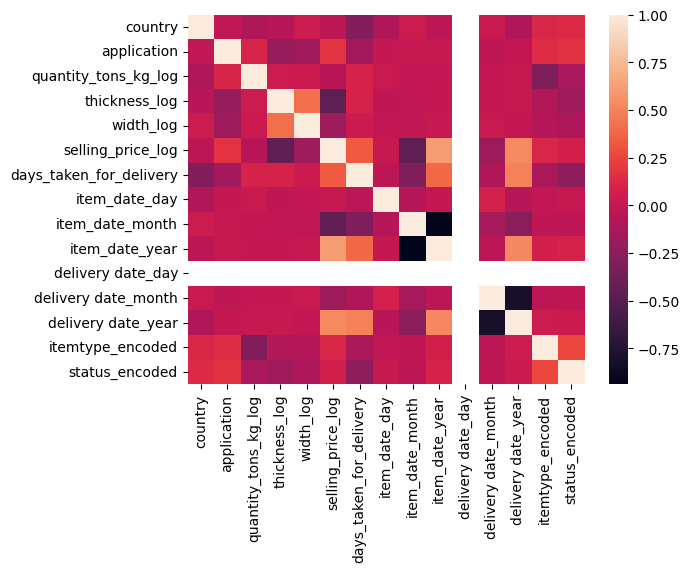

In [218]:
sns.heatmap(correlation_matrix)

In [219]:
#From this correlation heatmap we can understand that date feture of item and delivery are highly correlated, 
# but to predict the status,features like selling price, quantity, thickness, width, country, application, 
# days taken for delivery, are also important. Thus all the features are taken for modelling.


Model Building and Evaluation:
1. Split the dataset into training and testing/validation sets.
2. Train and evaluate different classification models, such as
ExtraTreesClassifier, XGBClassifier, or Logistic Regression, using
appropriate evaluation metrics such as accuracy, precision, recall, F1
score, and AUC curve.
3. Optimize model hyperparameters using techniques such as
cross-validation and grid search to find the best-performing model.
4. Interpret the model results and assess its performance based on the
defined problem statement.

In [220]:
from sklearn.model_selection import train_test_split

In [221]:
x_train,x_test,y_train,y_test = train_test_split(df12_encoded_X_standard_df, df12_encoded_Y, test_size = 0.2, random_state=42)

In [222]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((104128, 14), (26032, 14), (104128,), (26032,))

In [223]:
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

In [224]:
def model_fit_evaluation(models, x_train, y_train, x_test, y_test, metrics):
    results = {}
    
    for model_name, model in models.items():
        classification = model()
        classification.fit(x_train, y_train)
        y_prediction = classification.predict(x_test)
        results[model_name] = {}
        for metric_name, metric_func in metrics.items():
            if metric_func == confusion_matrix:
                results[model_name][metric_name] = metric_func(y_test, y_prediction).tolist()
            else:    
                results[model_name][metric_name] = metric_func(y_test, y_prediction)
    return results

models = {
    'Logistic Regression': LogisticRegression,
    'XGBoost': XGBClassifier,
    'Extra Trees': ExtraTreesClassifier,
    'Gradient Boosting': GradientBoostingClassifier,
    'Random Forest': RandomForestClassifier,
    'Decision Tree': DecisionTreeClassifier}

metrics = {
    'Accuracy': accuracy_score,
    'Precision': precision_score,
    'Recall': recall_score,
    'F1 Score': f1_score,
    'AUC': roc_auc_score,
    'Confusion Matrix': confusion_matrix} # Convert to list for easy readability

Structure of a Confusion Matrix for Binary Classification
For a binary classification task, the confusion matrix has the following format:

Here's what each term means:

True Positive (TP): The number of instances that are actually positive and were correctly predicted as positive.
False Positive (FP): The number of instances that are actually negative but were incorrectly predicted as positive (also known as a "Type I error").
True Negative (TN): The number of instances that are actually negative and were correctly predicted as negative.
False Negative (FN): The number of instances that are actually positive but were incorrectly predicted as negative (also known as a "Type II error").

In [225]:
model_fit_evaluation(models, x_train, y_train, x_test, y_test, metrics)

{'Logistic Regression': {'Accuracy': 0.7908727719729564,
  'Precision': 0.8128496661252481,
  'Recall': 0.9328914664457332,
  'F1 Score': 0.8687433696595621,
  'AUC': 0.6578147808419141,
  'Confusion Matrix': [[2572, 4148], [1296, 18016]]},
 'XGBoost': {'Accuracy': 0.9138368162261832,
  'Precision': 0.9301880135087454,
  'Recall': 0.9555716652858326,
  'F1 Score': 0.9427089984930143,
  'AUC': 0.874735237404821,
  'Confusion Matrix': [[5335, 1385], [858, 18454]]},
 'Extra Trees': {'Accuracy': 0.9640826674861709,
  'Precision': 0.9744900593854893,
  'Recall': 0.9771644573322287,
  'F1 Score': 0.9758254259637511,
  'AUC': 0.951826276285162,
  'Confusion Matrix': [[6226, 494], [441, 18871]]},
 'Gradient Boosting': {'Accuracy': 0.8267516902274125,
  'Precision': 0.8420687742651137,
  'Recall': 0.9434030654515327,
  'F1 Score': 0.8898603106378822,
  'AUC': 0.7174604612971949,
  'Confusion Matrix': [[3303, 3417], [1093, 18219]]},
 'Random Forest': {'Accuracy': 0.9615473263675476,
  'Precision

In [226]:
result_table_format = pd.DataFrame(model_fit_evaluation(models, x_train, y_train, x_test, y_test, metrics))
result_table_format

,Logistic Regression,XGBoost,Extra Trees,Gradient Boosting,Random Forest,Decision Tree
Accuracy,0.790873,0.913837,0.964159,0.826752,0.960856,0.93992
Precision,0.81285,0.930188,0.974934,0.842069,0.97062,0.958037
Recall,0.932891,0.955572,0.976802,0.943403,0.976802,0.961112
F1 Score,0.868743,0.942709,0.975867,0.88986,0.973701,0.959572
AUC,0.657815,0.874735,0.952315,0.71746,0.945916,0.920065
Confusion Matrix,"[[2572, 4148], [1296, 18016]]","[[5335, 1385], [858, 18454]]","[[6235, 485], [448, 18864]]","[[3303, 3417], [1093, 18219]]","[[6149, 571], [448, 18864]]","[[5907, 813], [751, 18561]]"


As per the above table, Random Forest and Extra Trees have higher accuracy but as per problem statement I go with Extra Trees.

Regression Model Training

In [227]:
df12_encoded_regression=df12_encoded.copy()
df12_encoded_regression.head(5)

,country,status,item type,application,quantity_tons_kg_log,thickness_log,width_log,selling_price_log,days_taken_for_delivery,item_date_day,item_date_month,item_date_year,delivery date_day,delivery date_month,delivery date_year,itemtype_encoded,status_encoded
0,28.0,Won,W,10.0,10.899534,0.693147,7.313220,6.749931,91,1,4,2021,1,7,2021,5,1
1,25.0,Won,W,41.0,13.551577,-0.223144,7.098376,6.953684,0,1,4,2021,1,4,2021,5,1
2,25.0,Won,W,41.0,12.327364,0.405465,7.142827,6.890609,0,1,4,2021,1,4,2021,5,1
3,38.0,Won,S,10.0,11.142903,-0.510826,7.150701,7.217443,91,1,4,2021,1,7,2021,3,1
4,25.0,Won,W,41.0,13.354470,0.405465,7.060476,6.890609,0,1,4,2021,1,4,2021,5,1


In [228]:
df12_encoded_X_regression= df12_encoded_regression.drop(columns=['selling_price_log','status_encoded','item type','status'], axis=1)

In [229]:
df12_encoded_X_regression.head(5)

,country,application,quantity_tons_kg_log,thickness_log,width_log,days_taken_for_delivery,item_date_day,item_date_month,item_date_year,delivery date_day,delivery date_month,delivery date_year,itemtype_encoded
0,28.0,10.0,10.899534,0.693147,7.313220,91,1,4,2021,1,7,2021,5
1,25.0,41.0,13.551577,-0.223144,7.098376,0,1,4,2021,1,4,2021,5
2,25.0,41.0,12.327364,0.405465,7.142827,0,1,4,2021,1,4,2021,5
3,38.0,10.0,11.142903,-0.510826,7.150701,91,1,4,2021,1,7,2021,3
4,25.0,41.0,13.354470,0.405465,7.060476,0,1,4,2021,1,4,2021,5


In [230]:
scaler_regression=StandardScaler()
df12_encoded_X_regression_standard=scaler_regression.fit_transform(df12_encoded_X_regression)
df12_encoded_X_regression_standard_df=pd.DataFrame(df12_encoded_X_regression_standard, columns=df12_encoded_X_regression.columns)
df12_encoded_Y_regression = df12_encoded_regression['selling_price_log']
df12_encoded_X_regression_standard_df1=df12_encoded_X_regression_standard_df.copy()
df12_encoded_X_regression_standard_df1["selling_price_log"]=df12_encoded["selling_price_log"]
df12_encoded_X_regression_standard_df1.head(5)

,country,application,quantity_tons_kg_log,thickness_log,width_log,days_taken_for_delivery,item_date_day,item_date_month,item_date_year,delivery date_day,delivery date_month,delivery date_year,itemtype_encoded,selling_price_log
0,-0.735867,-0.813158,0.485159,0.164988,0.802204,0.626971,-1.662841,-0.659421,1.19266,0.0,0.409168,0.615704,0.787253,6.749931
1,-0.857126,0.978367,2.544607,-0.817434,-0.383237,-1.700018,-1.662841,-0.659421,1.19266,0.0,-0.464686,0.615704,0.787253,6.953684
2,-0.857126,0.978367,1.593942,-0.143457,-0.137967,-1.700018,-1.662841,-0.659421,1.19266,0.0,-0.464686,0.615704,0.787253,6.890609
3,-0.331668,-0.813158,0.674147,-1.125878,-0.094521,0.626971,-1.662841,-0.659421,1.19266,0.0,0.409168,0.615704,-1.142481,7.217443
4,-0.857126,0.978367,2.391543,-0.143457,-0.592352,-1.700018,-1.662841,-0.659421,1.19266,0.0,-0.464686,0.615704,0.787253,6.890609


In [231]:
df12_encoded_X_regression_standard_df.head(5)

,country,application,quantity_tons_kg_log,thickness_log,width_log,days_taken_for_delivery,item_date_day,item_date_month,item_date_year,delivery date_day,delivery date_month,delivery date_year,itemtype_encoded
0,-0.735867,-0.813158,0.485159,0.164988,0.802204,0.626971,-1.662841,-0.659421,1.19266,0.0,0.409168,0.615704,0.787253
1,-0.857126,0.978367,2.544607,-0.817434,-0.383237,-1.700018,-1.662841,-0.659421,1.19266,0.0,-0.464686,0.615704,0.787253
2,-0.857126,0.978367,1.593942,-0.143457,-0.137967,-1.700018,-1.662841,-0.659421,1.19266,0.0,-0.464686,0.615704,0.787253
3,-0.331668,-0.813158,0.674147,-1.125878,-0.094521,0.626971,-1.662841,-0.659421,1.19266,0.0,0.409168,0.615704,-1.142481
4,-0.857126,0.978367,2.391543,-0.143457,-0.592352,-1.700018,-1.662841,-0.659421,1.19266,0.0,-0.464686,0.615704,0.787253


In [232]:
file_name_scaler_reg = r"C:\Users\HP USER\Documents\Guvi\Project\04_Copper_modelling\standard_scaler_regression.joblib"

In [233]:
joblib.dump(scaler_regression, file_name_scaler_reg)

['C:\\Users\\HP USER\\Documents\\Guvi\\Project\\04_Copper_modelling\\standard_scaler_regression.joblib']

In [234]:
#correlation_regression

In [235]:
correlation_matrix_regression = df12_encoded_X_regression_standard_df1.corr()

<Axes: >

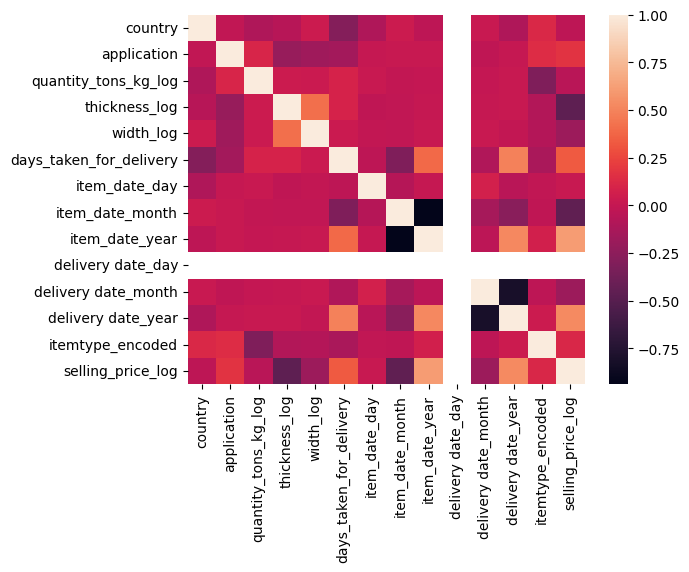

In [236]:
sns.heatmap(correlation_matrix_regression)

From the correlation chart we can understand that application, quanity, thickness, width, days taken for delivery, item type encoded but country, item dates and delivery dates are also taken for feature selection as it is important for prediction


In [237]:
df12_encoded_reg_Y = df12_encoded_X_regression_standard_df1['selling_price_log']

As per our problem statement we are asked to use Trees model so I choose to use 
1. Decision Tree Regressor
2. Random Forest Regressor
3. Gradient Boosting Regressor
4. XGB Regression

In [238]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [239]:
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(df12_encoded_X_regression_standard_df, df12_encoded_reg_Y, test_size=0.2, random_state=42)

In [240]:
def model_fit_evaluation_regr(models_reg, x_train_reg, y_train_reg, x_test_reg, y_test_reg, metrics_reg):
    results_reg = {}
    
    for model_name_reg, model_reg in models_reg.items():
        regression = model_reg()
        regression.fit(x_train_reg, y_train_reg)
        y_prediction_reg = regression.predict(x_test_reg)
        results_reg[model_name_reg] = {}
        for metric_name_reg, metric_func_reg in metrics_reg.items():
            results_reg[model_name_reg][metric_name_reg] = metric_func_reg(y_test_reg, y_prediction_reg)
    return results_reg

models_reg = {
    'XGBoost Regression': XGBRegressor,
    'Gradient Boosting Regression':GradientBoostingRegressor,
    'Random Forest Regression': RandomForestRegressor,
    'Decision Tree Regression': DecisionTreeRegressor}

metrics_reg = {
    'MSE' : mean_squared_error, 
    'MAE' : mean_absolute_error,
    'R2_Score' : r2_score} 

In [241]:
model_fit_evaluation_regr(models_reg, x_train_reg, y_train_reg, x_test_reg, y_test_reg, metrics_reg)

{'XGBoost Regression': {'MSE': 0.005795477276149988,
  'MAE': 0.05550986782517368,
  'R2_Score': 0.897013528836387},
 'Gradient Boosting Regression': {'MSE': 0.010324695840394041,
  'MAE': 0.07644968292704067,
  'R2_Score': 0.8165286585083147},
 'Random Forest Regression': {'MSE': 0.004123849753695704,
  'MAE': 0.04272136971216255,
  'R2_Score': 0.9267185921874256},
 'Decision Tree Regression': {'MSE': 0.007673296928421912,
  'MAE': 0.05197312224061858,
  'R2_Score': 0.8636444014540706}}

In [242]:
result_reg_table_format=pd.DataFrame(model_fit_evaluation_regr(models_reg, x_train_reg, y_train_reg, x_test_reg, y_test_reg, metrics_reg))
result_reg_table_format

,XGBoost Regression,Gradient Boosting Regression,Random Forest Regression,Decision Tree Regression
MSE,0.005795,0.010325,0.004122,0.007622
MAE,0.055510,0.076450,0.042817,0.051939
R2_Score,0.897014,0.816529,0.926757,0.864551


1. Mean Squared Error (MSE): Measures the average squared difference between the predicted and actual values. Lower values indicate better model performance.

2. Mean Absolute Error (MAE): Measures the average absolute difference between the predicted and actual values. Similar to MSE, lower values indicate better model performance, but MAE is less sensitive to outliers.

3. R² Score: Represents the proportion of the variance in the dependent variable that is predictable from the independent variables. Higher values (closer to 1) indicate better model performance.

1. MSE is lower for Random Forest Regression
2. MAE is lower for Random Forest Regression
3. R2_Score is higher for Random Forest Regression

Hyperparameters for Classification and Regression

In [243]:
from sklearn.model_selection import GridSearchCV

In [244]:
def hyperparameter_tuning_classification(algorithm,x_train,y_train):
    algorithm = algorithm()
    parameter_grid={
        "n_estimators" :[10,50,100],
        "max_features":["sqrt","log2"],
        "bootstrap":[True, False]
    }
    k_fold_cv = 5
    grid_search = GridSearchCV( estimator= algorithm, param_grid=parameter_grid, cv = k_fold_cv, n_jobs=-1, verbose = 2, return_train_score = True)
    grid_search.fit(x_train,y_train)
    best_params = grid_search.best_params_
    return f" Best parameters for {algorithm.__class__.__name__}: {best_params}"

def hyperparameter_tuning_regression(reg_algorithm, x_train_reg, y_train_reg):
    reg_algorithm = reg_algorithm()
    parametres_grid_reg = {
        "n_estimators": [ 10,50,100],
        "max_features": [ "sqrt","log2",None],
        "bootstrap": [ True, False]
    }
    k_fold_cv = 5
    grid_search = GridSearchCV( estimator= reg_algorithm, param_grid=parametres_grid_reg, cv = k_fold_cv, n_jobs=-1, verbose = 2, return_train_score = True)
    grid_search.fit(x_train_reg,y_train_reg)
    best_params = grid_search.best_params_
    return f" Best parameters for {reg_algorithm.__class__.__name__}: {best_params}"

In [245]:
hyperparameter_tuning_classification(RandomForestClassifier,x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


" Best parameters for RandomForestClassifier: {'bootstrap': False, 'max_features': 'log2', 'n_estimators': 100}"

In [185]:
hyperparameter_tuning_regression(RandomForestRegressor, x_train_reg, y_train_reg)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


" Best parameters for RandomForestRegressor: {'bootstrap': False, 'max_features': 'sqrt', 'n_estimators': 100}"

Classification model creation

In [246]:
model_class = RandomForestClassifier(bootstrap=False, max_features="log2",n_estimators=100,random_state=42)
model_class.fit(df12_encoded_X_standard_df, df12_encoded_Y)

RandomForestClassifier(bootstrap=False, max_features='log2', random_state=42)

In [247]:
class_file_name = r"C:\Users\HP USER\Documents\Guvi\Project\04_Copper_modelling\model_class.joblib"

In [248]:

from joblib import dump, load

In [249]:

dump(model_class,class_file_name)

['C:\\Users\\HP USER\\Documents\\Guvi\\Project\\04_Copper_modelling\\model_class.joblib']

Regression model creation

In [198]:
model_regression = RandomForestRegressor(bootstrap=False, max_features='sqrt',n_estimators=100,random_state=42)
model_regression.fit(df12_encoded_X_regression_standard_df, df12_encoded_reg_Y)

RandomForestRegressor(bootstrap=False, max_features='sqrt', random_state=42)

In [199]:
regression_file_name = r"C:\Users\HP USER\Documents\Guvi\Project\04_Copper_modelling\model_regression.joblib"

In [200]:

dump(model_regression,regression_file_name)

['C:\\Users\\HP USER\\Documents\\Guvi\\Project\\04_Copper_modelling\\model_regression.joblib']